# <font color=deeppink>**Exploratory Data Analysis**</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color=royalblue>Load Necessary Libraries</font>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from pandas.plotting import scatter_matrix

## <font color=royalblue>Pertinent Functions</font>

In [ ]:
# Extract the Values and Their Corresponding Counts From a Column
def getCountsandLabels(column):
    i = 0
    # List of All Labels in the Column
    labels = []
    # List of the Value Counts for Each Label
    counts = []
    
    # Store the Value Counts as a Variable
    value_counts = column.value_counts()
    
    while i < len(column.value_counts()):
        # Add the Label to the Labels List
        labels.append(value_counts.index[i])
        
        # Add the Corresponding Value to the Counts List
        counts.append(value_counts[i])
        
        # Increase the Counter
        i += 1
    
    # Return a List of Both Lists
    return([counts, labels])


def collegesCountsandLabels(column):
    i = 0
    other_count = 0
    # List of All Labels in the Column
    labels = []
    # List of the Value Counts for Each Label
    counts = []
    
    # Store the Value Counts as a Variable
    value_counts = column.value_counts()
    
    while i < len(column.value_counts()):
        if value_counts[i] > 1:
            label = value_counts.index[i].split(" ")
            
            new_label = ""
        
            for word in label:
                if (word == "OF") | (word == "AND"):
                    # Entire Word Should be Lowercase
                    new_label += word.lower()
                elif word == "NJ":
                    new_label += word
                else:
                    # Only the First Letter Should be Uppercase
                    new_label += word[0]
                    new_label += word[1:].lower()

                # Add a Space
                new_label += " "
        
            # Append the Label Without the Trailing Space
            labels.append(new_label.strip())

            # Add the Corresponding Value to the Counts List
            counts.append(value_counts[i])

        else:
            other_count += 1
        
        # Increase the Counter
        i += 1
            
    # Add the "Other" Label and other_count Value to Their Respective Lists
    labels.append("Other")
    counts.append(other_count)
    
    # Return a List of Both Lists
    return([counts, labels])


def yesNoCountsandLabels(column):
    rankedCountsandLabels = getCountsandLabels(column)
    
    # Extract the Counts and Labels Lists
    rankedCounts = rankedCountsandLabels[0]
    rankedLabels = rankedCountsandLabels[1]
    
    if len(rankedLabels) == 1:
        labelNames = ["Yes", "No"]
        
        # Remove the Existing Label
        labelNames.remove(rankedLabels[0])
        
        # Add the Remaining Label to rankedLabels
        rankedLabels.append(labelNames[0])
        
        # Add a Value of Zero to rankedCounts
        rankedCounts.append(0)
    
    # Check if "Yes" Is First in the Labels List
    if (rankedLabels[0] == "Took At Least One") | (rankedLabels[0] == "Yes"):
        pass
    else:
        # Reverse the Lists Inplace
        rankedCounts.reverse()
        rankedLabels.reverse()
        
    counts = rankedCounts
    labels = rankedLabels
    
    # Return a List of Both Lists
    return([counts, labels])


def manyLabels(column, labelsList):
    # Label Counter
    j = 0
    
    # List of All Labels in the Column
    labels = labelsList
    
    # List of the Value Counts for Each Label
    counts = []
    
    # Store the Value Counts as a Variable
    value_counts = column.value_counts()
     
    while j < len(labels):
        # Value Counter
        i = 0
        
        while i < len(labels):
            
            if value_counts.index[i] == labels[j]:
                
                # Add the Corresponding Value to the Counts List
                counts.append(value_counts[i])

                # Increase the Label Counter
                j += 1
                break
            
            # Increase the Value Counter
            i += 1
            
            # The Label Has Zero Instances
            if i == len(value_counts):
                # Add a Value of Zero to counts
                counts.append(0)
                
                # Increase the Label Counter
                j += 1
                break
        
    # Return a List of Both Lists
    return([counts, labels])


# Compute the Optimal Number of Bins for the Histogram
def computeNumberofBins(column):
    # Numerator
    maximum = column.max()
    minimum = column.min()
    
    numerator = maximum - minimum
    
    # Denominator
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    
    IQR = q3 - q1
    
    n = len(column)
    
    denominator = 2 * IQR * (n**(-1/3))
    
    nbins = numerator/denominator
    
    # Return the Integer Ceiling of the Computed Value
    return int(np.ceil(nbins))


# Extract the Continuous Values and Their Corresponding Counts From a Column
def continuousBars(column):
    # Initialize the Counter
    continuous_counter = Counter()
    
    # Update the Counter
    continuous_counter.update(column)

    # List of All Labels in the Column
    labels = []
    # List of the Value Counts for Each Label
    counts = []
    
    # Create a List of the Labels to Be Placed in Numerical Order
    keyList = list(continuous_counter.keys())
    keyList.sort()

    for key in keyList:
        if isinstance(key, float):
            # Round Decimals to Two Decimal Places
            labels.append("{0:.2f}".format(key))
        else:
            labels.append(item)
        
        counts.append(continuous_counter[key])
        
    # Return a List of Both Lists
    return([counts, labels])


# Extract the ZipCodes and Their Corresponding Population Values
def areaAndPopulationBars(columnsofDataFrame):
    # A List of the ZipCodes, Removing the Hashtags From the Front
    labels = columnsofDataFrame.iloc[:, 0].transform(lambda x: x[1:]).values
    
    # A List of the Integer Population Values
    counts = columnsofDataFrame.iloc[:, 1].transform(lambda x: int(x)).values
    
    # Return a List of Both Lists
    return([counts, labels])


# Extract the High Schools and Their Corresponding Continuous Values
def HSContinuous(columnsofDataFrame):
    # A List of the High Schools
    labels = columnsofDataFrame.iloc[:, 0].values
    
    # A List of the Continuous Values
    counts = columnsofDataFrame.iloc[:, 1].transform(lambda x: int(x)).values
    
    # Return a List of Both Lists
    return([counts, labels])


# Extract the ZipCodes and Compute Their Corresponding Crime Index Percentage Values
def computeCrimePercentage(columnsofDataFrame):
    # A List of the ZipCodes, Removing the Hashtags From the Front
    labels = columnsofDataFrame.iloc[:, 0].transform(lambda x: x[1:]).values
    
    # A List of the Integer Population Values
    counts = columnsofDataFrame.iloc[:, 1].transform(lambda x: int(x) - 100).values
    
    # Return a List of Both Lists
    return([counts, labels])

## <font color=royalblue>Read In Data</font>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thesis/Codes/Final Datasets/cjb_final_dataset_eda.csv", index_col="ID")
df

,Gender,Hispanic,AmerInd,Asian,Black,White,Hawaiian,Multinational,LimitedEnglish,Eligibility,...,Student_AssaultsCateg,Student_PropertyCrimesCateg,Student_BurglariesCateg,Student_LarceniesCateg,Student_VehicleTheftsCateg,Distance_to_HS,Distance_to_PS,PS_Graduated,Student_City,HS_City
ID,,,,,,,,,,,,,,,,,,,,,
0,Male,No,No,No,Yes,No,No,No,No,Low Income & First Generation,...,High,Low,High,Low,High,1.527317,2.651641,No,Paterson,Paterson
1,Female,Yes,No,No,No,No,No,No,No,Low Income,...,High,High,High,Low,High,3.227670,27.026511,Yes,Paterson,Paterson
2,Male,Yes,No,No,No,No,No,No,No,First Generation,...,High,High,High,Low,High,1.803466,5.922479,No,Paterson,Paterson
3,Male,No,No,No,Yes,No,No,No,No,Low Income & First Generation,...,High,Low,High,Low,High,1.287508,20.718053,No,Paterson,Paterson
4,Female,Yes,No,No,No,No,No,No,No,First Generation,...,Low,Low,High,Low,High,4.410934,2.378576,Yes,Paterson,Paterson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Male,Yes,No,No,No,No,No,No,No,Low Income & First Generation,...,Low,Low,Low,Low,High,19.355286,20.589324,No,Paterson,Newark
120,Female,No,No,No,No,Yes,No,No,No,Low Income & First Generation,...,Low,Low,High,Low,High,22.010710,161.404493,No,Paterson,Newark
121,Male,Yes,No,No,No,No,No,No,No,Low Income & First Generation,...,Low,Low,Low,Low,High,2.954628,18.060702,Yes,Paterson,Paterson


In [ ]:
eda_df = df.copy()

## <font color=royalblue>Determine if the Dataset is Balanced</font>

In [ ]:
eda_df.PS_Graduated.value_counts()

Yes    69
No     55
Name: PS_Graduated, dtype: int64

In [ ]:
percentage = (len(eda_df[eda_df.PS_Graduated == "No"])/len(eda_df.PS_Graduated))*100
print("Percentage of Students That Dropped Out of College: ", str(round(percentage, 2)) + "%")

Percentage of Students That Dropped Out of College:  44.35%


In [ ]:
percentage = (len(eda_df[eda_df.PS_Graduated == "Yes"])/len(eda_df.PS_Graduated))*100
print("Percentage of Students That Graduated from College: ", str(round(percentage, 2)) + "%")

Percentage of Students That Graduated from College:  55.65%


## <font color=royalblue>Assess the Distribution of Each Column</font>

#### <font color=darkviolet>Categorical</font>

##### <font color=mediumorchid>Pie Charts</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (8,5.5)

# Increase the Font Size of the Plots
plt.rcParams.update({'font.size': 18})

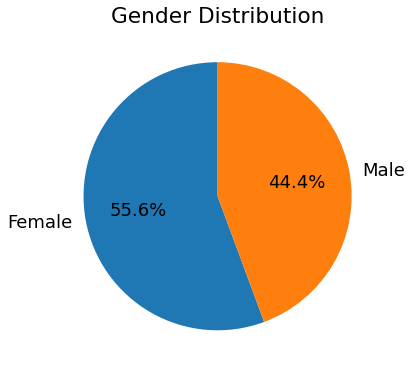

In [ ]:
# Gender
## Obtain the Data
genderInfo = getCountsandLabels(eda_df.Gender)


## Create the Chart
plt.pie(genderInfo[0], labels=genderInfo[1], startangle=90, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

In [ ]:
eda_df.groupby(["Gender", "PS_Graduated"]).agg("count")

Hispanic  AmerInd  Asian  Black  White  Hawaiian  \
Gender PS_Graduated                                                     
Female No                  30       30     30     30     30        30   
       Yes                 39       39     39     39     39        39   
Male   No                  25       25     25     25     25        25   
       Yes                 30       30     30     30     30        30   

                     Multinational  LimitedEnglish  Eligibility  AcademNeed  \
Gender PS_Graduated                                                           
Female No                       30              30           30          30   
       Yes                      39              39           39          39   
Male   No                       25              25           25          25   
       Yes                      30              30           30          30   

                     ...  Student_RobberiesCateg  Student_AssaultsCateg  \
Gender PS_Graduated  ...                                                  
Female No            ...                      30                     30   
       Yes           ...                      39                     39   
Male   No            ...                      25                     25   
       Yes           ...                      30                     30   

                     Student_PropertyCrimesCateg  Student_BurglariesCateg  \
Gender PS_Graduated                                                         
Female No                                     30                       30   
       Yes                                    39                       39   
Male   No                                     25                       25   
       Yes                                    30                       30   

                     Student_LarceniesCateg  Student_VehicleTheftsCateg  \
Gender PS_Graduated                                                       
Female No                                30                          30   
       Yes                               39                          39   
Male   No                                25                          25   
       Yes                               30                          30   

                     Distance_to_HS  Distance_to_PS  Student_City  HS_City  
Gender PS_Graduated                                                         
Female No                        30              30            30       30  
       Yes                       39              39            39       39  
Male   No                        25              25            25       25  
       Yes                       30              30            30       30  

[4 rows x 106 columns]

In [ ]:
eda_df.groupby("Gender").PS_Graduated.agg("count")

Gender
Female    69
Male      55
Name: PS_Graduated, dtype: int64

In [ ]:
eda_df.Gender.value_counts()

Female    69
Male      55
Name: Gender, dtype: int64

In [ ]:
eda_df.PS_Graduated.value_counts()

Yes    69
No     55
Name: PS_Graduated, dtype: int64

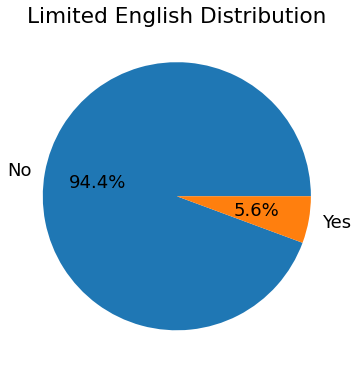

In [ ]:
# Limited English
## Obtain the Data
limitedEnglishInfo = getCountsandLabels(eda_df.LimitedEnglish)


## Create the Chart
plt.pie(limitedEnglishInfo[0], labels=limitedEnglishInfo[1], autopct="%1.1f%%")
plt.title("Limited English Distribution")
plt.tight_layout()
plt.show()

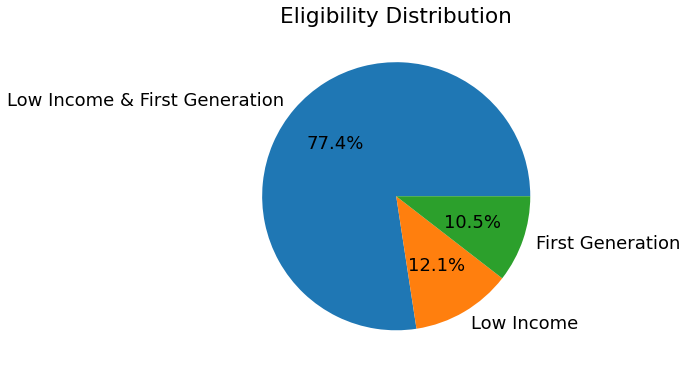

In [ ]:
# Eligibility
## Obtain the Data
eligibilityInfo = getCountsandLabels(eda_df.Eligibility)


## Create the Chart
plt.pie(eligibilityInfo[0], labels=eligibilityInfo[1], autopct="%1.1f%%")
plt.title("Eligibility Distribution")
plt.tight_layout()
plt.show()

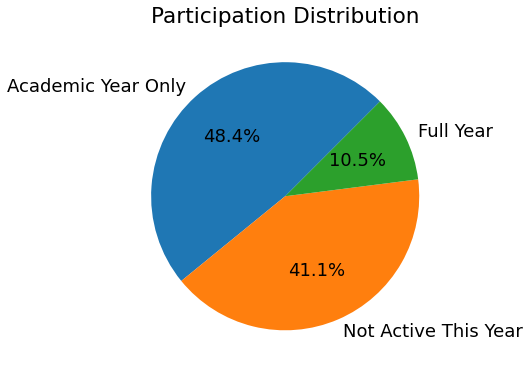

In [ ]:
# Participation
## Obtain the Data
participationInfo = getCountsandLabels(eda_df.Participation)


## Create the Chart
plt.pie(participationInfo[0], labels=participationInfo[1], startangle=45, autopct="%1.1f%%")
plt.title("Participation Distribution")
plt.tight_layout()
plt.show()

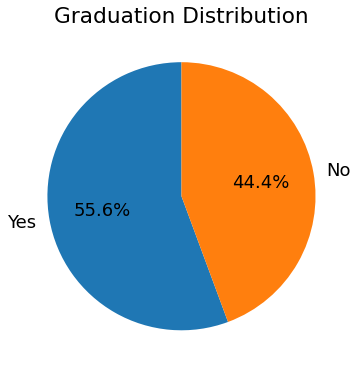

In [ ]:
# Graduated College
## Obtain the Data
graduationInfo = getCountsandLabels(eda_df.PS_Graduated)


## Create the Chart
plt.pie(graduationInfo[0], labels=graduationInfo[1], startangle=90, autopct="%1.1f%%")
plt.title("Graduation Distribution")
plt.tight_layout()
plt.show()

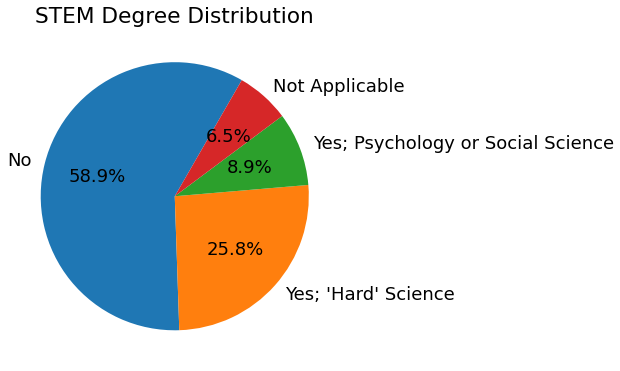

In [ ]:
# Obtained a STEM Degree
## Obtain the Data
STEMInfo = getCountsandLabels(eda_df.STEMDeg)


## Create the Chart
plt.pie(STEMInfo[0], labels=STEMInfo[1], startangle=60, autopct="%1.1f%%")
plt.title("STEM Degree Distribution")
plt.tight_layout()
plt.show()

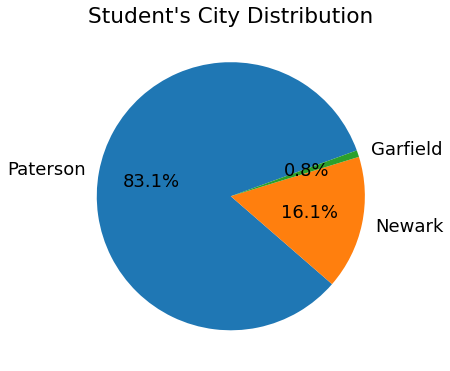

In [ ]:
# Student's City
## Obtain the Data
StudentCityInfo = getCountsandLabels(eda_df.Student_City)


## Create the Chart
plt.pie(StudentCityInfo[0], labels=StudentCityInfo[1], startangle=20, autopct="%1.1f%%")
plt.title("Student's City Distribution")
plt.tight_layout()
plt.show()

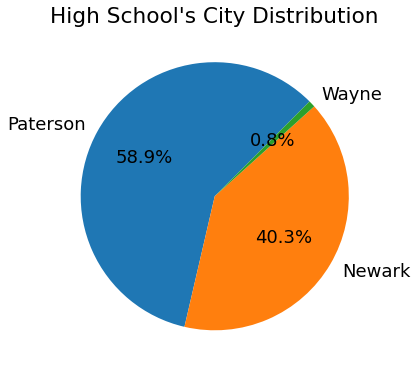

In [ ]:
# High School's City
## Obtain the Data
HSCityInfo = getCountsandLabels(eda_df.HS_City)


## Create the Chart
plt.pie(HSCityInfo[0], labels=HSCityInfo[1], startangle=45, autopct="%1.1f%%")
plt.title("High School's City Distribution")
plt.tight_layout()
plt.show()

##### <font color=mediumorchid>Bar Charts</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (14,5.5)

# Decrease the Font Size of the Plots
plt.rcParams.update({'font.size': 14})

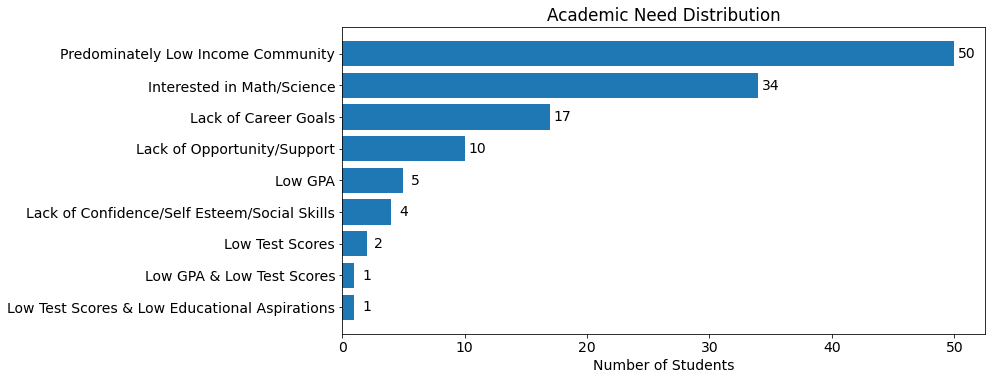

In [ ]:
# Academic Need
## Obtain the Data
academNeedInfo = getCountsandLabels(eda_df.AcademNeed)

labels = academNeedInfo[1]
counts = academNeedInfo[0]

# Reverse the Lists Inplace
labels.reverse()
counts.reverse()


## Create the Chart
hbars = plt.barh(labels, counts)
plt.title("Academic Need Distribution")
plt.xlabel("Number of Students")

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(counts[i] + 1, labels[i], counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

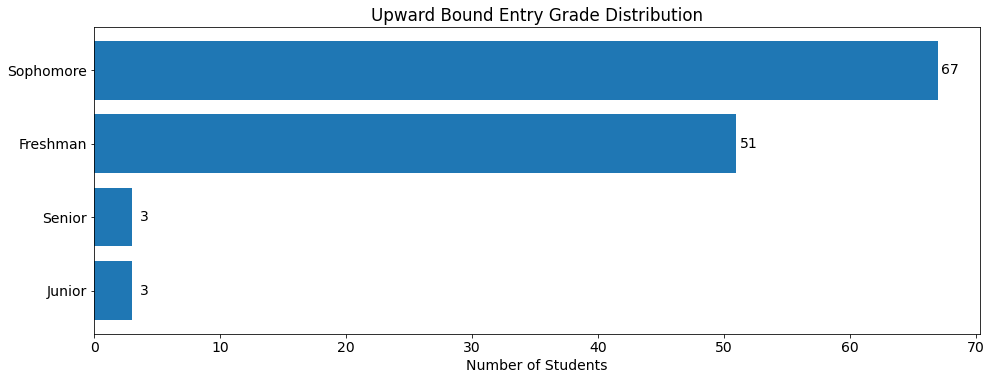

In [ ]:
# Grade Entered Upward Bound
## Obtain the Data
gradeEnteredInfo = getCountsandLabels(eda_df.Grade_EnteredUB)

labels = gradeEnteredInfo[1]
counts = gradeEnteredInfo[0]

# Reverse the Lists Inplace
labels.reverse()
counts.reverse()


## Create the Chart
hbars = plt.barh(labels, counts)
plt.title("Upward Bound Entry Grade Distribution")
plt.xlabel("Number of Students")

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(counts[i] + 1, labels[i], counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

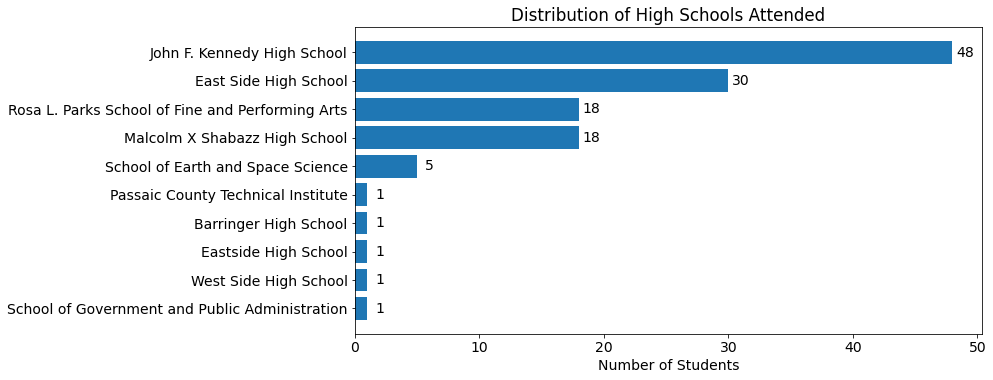

In [ ]:
# High School Attended
## Obtain the Data
HSInfo = getCountsandLabels(eda_df.HS_SchoolName)

labels = HSInfo[1]
counts = HSInfo[0]

# Reverse the Lists Inplace
labels.reverse()
counts.reverse()


## Create the Chart
hbars = plt.barh(labels, counts)
plt.title("Distribution of High Schools Attended")
plt.xlabel("Number of Students")

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(counts[i] + 1, labels[i], counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

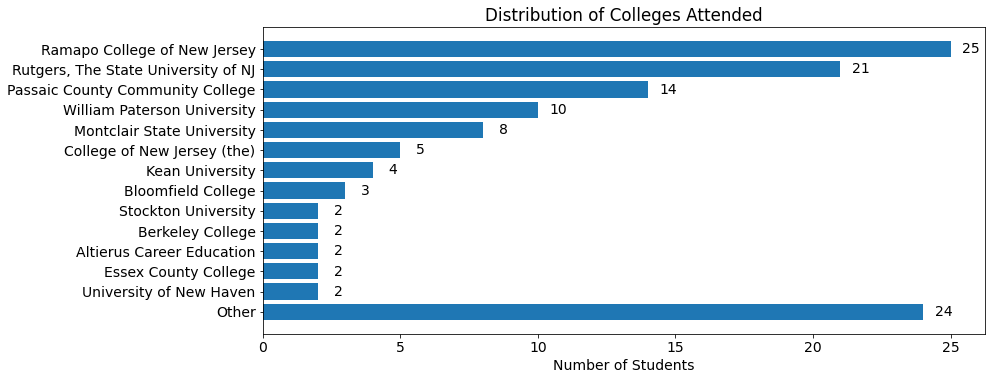

In [ ]:
# College Attended
## Obtain the Data
PSInfo = collegesCountsandLabels(eda_df.PS_SchoolName)

labels = PSInfo[1]
counts = PSInfo[0]

# Reverse the Lists Inplace
labels.reverse()
counts.reverse()


## Create the Chart
hbars = plt.barh(labels, counts)
plt.title("Distribution of Colleges Attended")
plt.xlabel("Number of Students")

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(counts[i] + 0.75, labels[i], counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

##### <font color=mediumorchid>Grouped Bars Chart</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Decrease the Size of the Plots
plt.rcParams["figure.figsize"] = (10,6.5)

# Maintain the Font Size of the Plots
plt.rcParams.update({'font.size': 14})

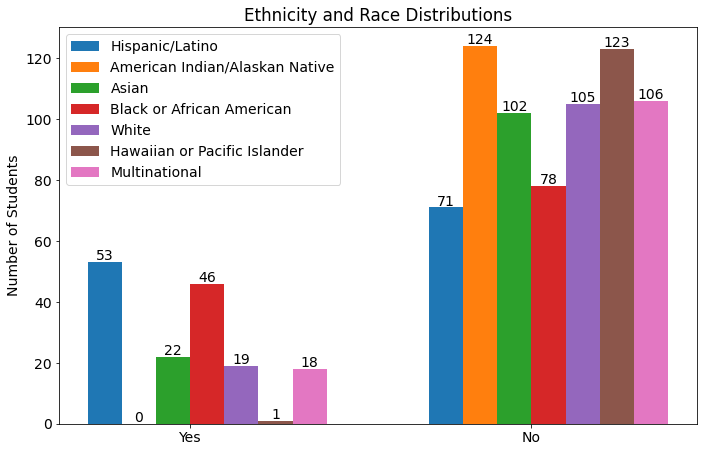

In [ ]:
# Ethnicity and Race
categories = ["Yes", "No"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.1

## Obtain the Data
### Hispanic
HispanicInfo = yesNoCountsandLabels(eda_df.Hispanic)
Hispanic_labels = HispanicInfo[1]
Hispanic_counts = HispanicInfo[0]

### American Indian
AmerIndInfo = yesNoCountsandLabels(eda_df.AmerInd)
AmerInd_labels = AmerIndInfo[1]
AmerInd_counts = AmerIndInfo[0]

### Asian
AsianInfo = yesNoCountsandLabels(eda_df.Asian)
Asian_labels = AsianInfo[1]
Asian_counts = AsianInfo[0]

### Black
BlackInfo = yesNoCountsandLabels(eda_df.Black)
Black_labels = BlackInfo[1]
Black_counts = BlackInfo[0]

### White
WhiteInfo = yesNoCountsandLabels(eda_df.White)
White_labels = WhiteInfo[1]
White_counts = WhiteInfo[0]

### Hawaiian
HawaiianInfo = yesNoCountsandLabels(eda_df.Hawaiian)
Hawaiian_labels = HawaiianInfo[1]
Hawaiian_counts = HawaiianInfo[0]

### Multinational
MultinationalInfo = yesNoCountsandLabels(eda_df.Multinational)
Multinational_labels = MultinationalInfo[1]
Multinational_counts = MultinationalInfo[0]


## Create the Chart
plt.bar(x - (5 * (width/2)), Hispanic_counts, width, label="Hispanic/Latino")
plt.bar(x - (3 * (width/2)), AmerInd_counts, width, label="American Indian/Alaskan Native")
plt.bar(x - width/2, Asian_counts, width, label="Asian")
plt.bar(x + width/2, Black_counts, width, label="Black or African American")
plt.bar(x + (3 * (width/2)), White_counts, width, label="White")
plt.bar(x + (5 * (width/2)), Hawaiian_counts, width, label="Hawaiian or Pacific Islander")
plt.bar(x + (7 * (width/2)), Multinational_counts, width, label="Multinational")
plt.title("Ethnicity and Race Distributions")
plt.ylabel("Number of Students")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - (5 * (width/2)), Hispanic_counts[i] + 2, Hispanic_counts[i], ha="center", va="center")
    plt.text(x[i] - (3 * (width/2)), AmerInd_counts[i] + 2, AmerInd_counts[i], ha="center", va="center")
    plt.text(x[i] - width/2, Asian_counts[i] + 2, Asian_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, Black_counts[i] + 2, Black_counts[i], ha="center", va="center")
    plt.text(x[i] + (3 * (width/2)), White_counts[i] + 2, White_counts[i], ha="center", va="center")
    plt.text(x[i] + (5 * (width/2)), Hawaiian_counts[i] + 2, Hawaiian_counts[i], ha="center", va="center")
    plt.text(x[i] + (7 * (width/2)), Multinational_counts[i] + 2, Multinational_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

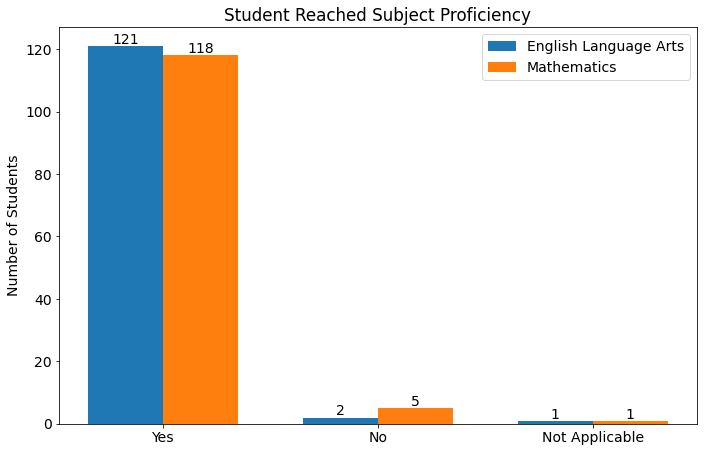

In [ ]:
# ELA and Math Academic Achievement
categories = ["Yes", "No", "Not Applicable"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.35

## Obtain the Data
### English Language Arts
ELAInfo = manyLabels(eda_df.AcademAch_ELA, categories)
ELA_labels = ELAInfo[1]
ELA_counts = ELAInfo[0]

### Mathematics
MathInfo = manyLabels(eda_df.AcademAch_Math, categories)
Math_labels = MathInfo[1]
Math_counts = MathInfo[0]


## Create the Chart
plt.bar(x - width/2, ELA_counts, width, label="English Language Arts")
plt.bar(x + width/2, Math_counts, width, label="Mathematics")
plt.title("Student Reached Subject Proficiency")
plt.ylabel("Number of Students")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - width/2, ELA_counts[i] + 2, ELA_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, Math_counts[i] + 2, Math_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

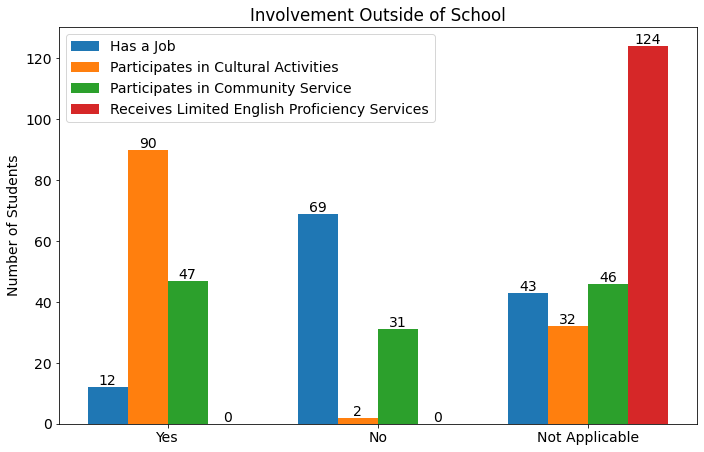

In [ ]:
# Involvement Outside of School
categories = ["Yes", "No", "Not Applicable"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.19

## Obtain the Data
### Employed
EmployedInfo = manyLabels(eda_df.Employed, categories)
Employed_labels = EmployedInfo[1]
Employed_counts = EmployedInfo[0]

### Cultural Activities
CultActInfo = manyLabels(eda_df.CulturalAct, categories)
CultAct_labels = CultActInfo[1]
CultAct_counts = CultActInfo[0]

### Community Service
CommServInfo = manyLabels(eda_df.CommServ, categories)
CommServ_labels = CommServInfo[1]
CommServ_counts = CommServInfo[0]

### Limited English Proficiency Services
LEPServsInfo = manyLabels(eda_df.LEPServs, categories)
LEPServs_labels = LEPServsInfo[1]
LEPServs_counts = LEPServsInfo[0]


## Create the Chart
plt.bar(x - (3 * (width/2)), Employed_counts, width, label="Has a Job")
plt.bar(x - width/2, CultAct_counts, width, label="Participates in Cultural Activities")
plt.bar(x + width/2, CommServ_counts, width, label="Participates in Community Service")
plt.bar(x + (3 * (width/2)), LEPServs_counts, width, label="Receives Limited English Proficiency Services")
plt.title("Involvement Outside of School")
plt.ylabel("Number of Students")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - (3 * (width/2)), Employed_counts[i] + 2, Employed_counts[i], ha="center", va="center")
    plt.text(x[i] - width/2, CultAct_counts[i] + 2, CultAct_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, CommServ_counts[i] + 2, CommServ_counts[i], ha="center", va="center")
    plt.text(x[i] + (3 * (width/2)), LEPServs_counts[i] + 2, LEPServs_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

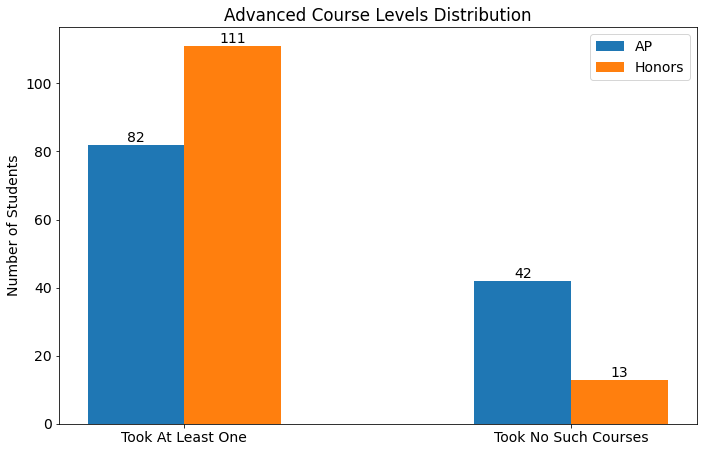

In [ ]:
# AP and Honors
categories = ["Took At Least One", "Took No Such Courses"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.25

## Obtain the Data
### Advanced Placement
APInfo = yesNoCountsandLabels(eda_df.AP)
AP_labels = APInfo[1]
AP_counts = APInfo[0]

### Honors
HonorsInfo = yesNoCountsandLabels(eda_df.Honors)
Honors_labels = HonorsInfo[1]
Honors_counts = HonorsInfo[0]


## Create the Chart
plt.bar(x - width/2, AP_counts, width, label="AP")
plt.bar(x + width/2, Honors_counts, width, label="Honors")
plt.title("Advanced Course Levels Distribution")
plt.ylabel("Number of Students")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - width/2, AP_counts[i] + 2, AP_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, Honors_counts[i] + 2, Honors_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
eda_df.groupby(["Gender", "PS_Graduated"]).agg("count")

Hispanic  AmerInd  Asian  Black  White  Hawaiian  \
Gender PS_Graduated                                                     
Female No                  30       30     30     30     30        30   
       Yes                 39       39     39     39     39        39   
Male   No                  25       25     25     25     25        25   
       Yes                 30       30     30     30     30        30   

                     Multinational  LimitedEnglish  Eligibility  AcademNeed  \
Gender PS_Graduated                                                           
Female No                       30              30           30          30   
       Yes                      39              39           39          39   
Male   No                       25              25           25          25   
       Yes                      30              30           30          30   

                     ...  Student_RobberiesCateg  Student_AssaultsCateg  \
Gender PS_Graduated  ...                                                  
Female No            ...                      30                     30   
       Yes           ...                      39                     39   
Male   No            ...                      25                     25   
       Yes           ...                      30                     30   

                     Student_PropertyCrimesCateg  Student_BurglariesCateg  \
Gender PS_Graduated                                                         
Female No                                     30                       30   
       Yes                                    39                       39   
Male   No                                     25                       25   
       Yes                                    30                       30   

                     Student_LarceniesCateg  Student_VehicleTheftsCateg  \
Gender PS_Graduated                                                       
Female No                                30                          30   
       Yes                               39                          39   
Male   No                                25                          25   
       Yes                               30                          30   

                     Distance_to_HS  Distance_to_PS  Student_City  HS_City  
Gender PS_Graduated                                                         
Female No                        30              30            30       30  
       Yes                       39              39            39       39  
Male   No                        25              25            25       25  
       Yes                       30              30            30       30  

[4 rows x 106 columns]

In [ ]:
eda_df.groupby(["Gender", "PS_Graduated"]).agg("count")

# Graduated and Dropped Out
categories = ["Graduated", "Dropped out"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.25

## Obtain the Data
### Female
FemaleInfo = yesNoCountsandLabels(eda_df.Gender)
Female_labels = FemaleInfo[1]
Female_counts = FemaleInfo[0]

### Male
HonorsInfo = yesNoCountsandLabels(eda_df.Honors)
Honors_labels = HonorsInfo[1]
Honors_counts = HonorsInfo[0]


## Create the Chart
plt.bar(x - width/2, AP_counts, width, label="AP")
plt.bar(x + width/2, Honors_counts, width, label="Honors")
plt.title("Advanced Course Levels Distribution")
plt.ylabel("Number of Students")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - width/2, AP_counts[i] + 2, AP_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, Honors_counts[i] + 2, Honors_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (14,6.5)

# Decrease the Font Size of the Plots
plt.rcParams.update({'font.size': 12})

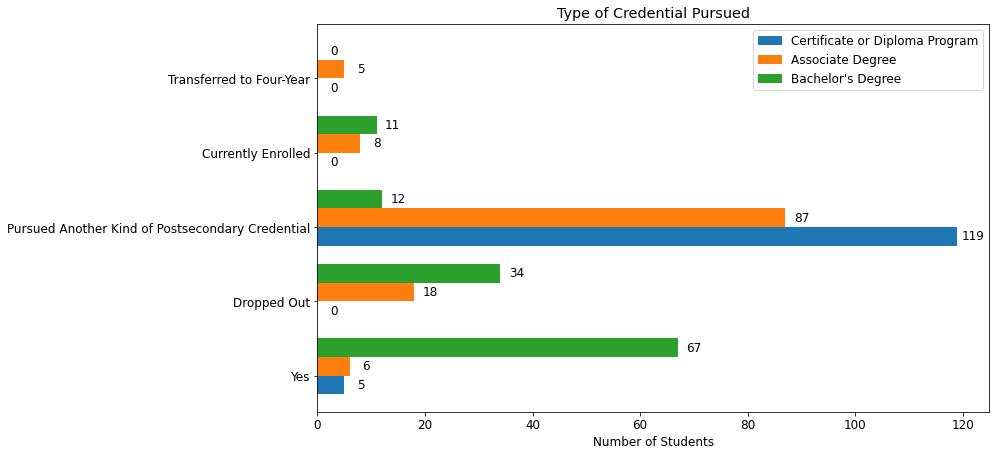

In [ ]:
# Type of Credential Pursued
categories = ["Yes", "Dropped Out", "Pursued Another Kind of Postsecondary Credential", 
              "Currently Enrolled", "Transferred to Four-Year"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.25

## Obtain the Data
### Certificate or Diploma
CertDiplInfo = manyLabels(eda_df.Cert_or_Diploma, categories)
CertDipl_labels = CertDiplInfo[1]
CertDipl_counts = CertDiplInfo[0]

### Associate Degree
AssocInfo = manyLabels(eda_df.AssocDeg, categories)
Assoc_labels = AssocInfo[1]
Assoc_counts = AssocInfo[0]

### Bachelor's Degree
BachInfo = manyLabels(eda_df.BachDeg, categories)
Bach_labels = BachInfo[1]
Bach_counts = BachInfo[0]


## Create the Chart
plt.barh(x - width/2, CertDipl_counts, width, label="Certificate or Diploma Program")
plt.barh(x + width/2, Assoc_counts, width, label="Associate Degree")
plt.barh(x + (3 * (width/2)), Bach_counts, width, label="Bachelor's Degree")
plt.title("Type of Credential Pursued")
plt.xlabel("Number of Students")
plt.yticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(CertDipl_counts[i] + 3, x[i] - width/2, CertDipl_counts[i], ha="center", va="center")
    plt.text(Assoc_counts[i] + 3, x[i] + width/2, Assoc_counts[i], ha="center", va="center")
    plt.text(Bach_counts[i] + 3, x[i] + (3 * (width/2)), Bach_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

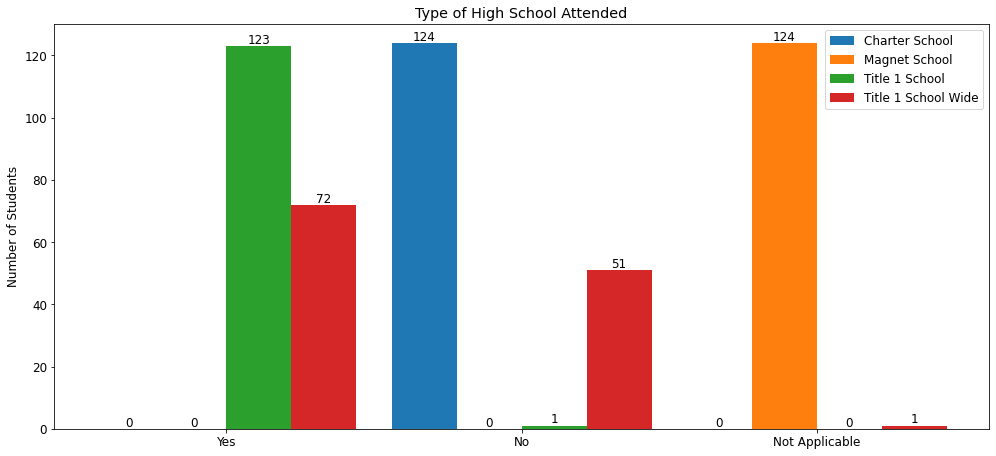

In [ ]:
# Type of High School Attended
categories = ["Yes", "No", "Not Applicable"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.22

## Obtain the Data
### Charter
CharterInfo = manyLabels(eda_df.Charter, categories)
Charter_labels = CharterInfo[1]
Charter_counts = CharterInfo[0]

### Magnet
MagnetInfo = manyLabels(eda_df.Magnet, categories)
Magnet_labels = MagnetInfo[1]
Magnet_counts = MagnetInfo[0]

### Title 1 School
Title1Info = manyLabels(eda_df.Title1_School, categories)
Title1_labels = Title1Info[1]
Title1_counts = Title1Info[0]

### Title 1 School Wide
Title1SWInfo = manyLabels(eda_df.Title1_SchoolWide, categories)
Title1SW_labels = Title1SWInfo[1]
Title1SW_counts = Title1SWInfo[0]


## Create the Chart
plt.bar(x - (3 * (width/2)), Charter_counts, width, label="Charter School")
plt.bar(x - width/2, Magnet_counts, width, label="Magnet School")
plt.bar(x + width/2, Title1_counts, width, label="Title 1 School")
plt.bar(x + (3 * (width/2)), Title1SW_counts, width, label="Title 1 School Wide")
plt.title("Type of High School Attended")
plt.ylabel("Number of Students")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - (3 * (width/2)), Charter_counts[i] + 2, Charter_counts[i], ha="center", va="center")
    plt.text(x[i] - width/2, Magnet_counts[i] + 2, Magnet_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, Title1_counts[i] + 2, Title1_counts[i], ha="center", va="center")
    plt.text(x[i] + (3 * (width/2)), Title1SW_counts[i] + 2, Title1SW_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (14,8.5)

# Maintain the Font Size of the Plots
plt.rcParams.update({'font.size': 12})

In [ ]:
# Create a List of Lists
## We Will Use This to Create the HS_ZIP DataFrame
HS_ZIP_Info = list()

# Extract One Row for Each High School ZIP Code
## The Crime Information Is Constant for All Instances
for zipcode in set(eda_df.HS_ZIP.values):
    # Mask the DataFrame and Extract the First Row
    df = eda_df[eda_df.HS_ZIP == zipcode].iloc[0]
    
    # Append the Row's Values to HS_ZIP_Info
    HS_ZIP_Info.append(df.values)
    
# Create the DataFrame
HS_ZIP_df = pd.DataFrame(HS_ZIP_Info, columns=eda_df.columns.values)

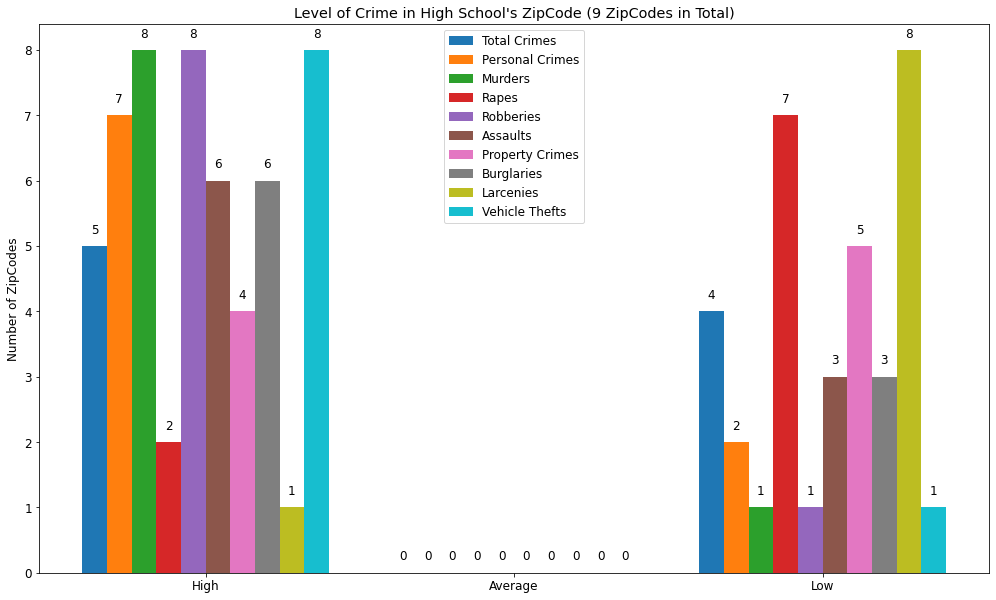

In [ ]:
# Level of Crime in High School's ZipCode
categories = ["High", "Average", "Low"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.08

## Obtain the Data
### Total Crimes
TotalCrimesInfo = manyLabels(HS_ZIP_df.HS_TotalCrimesCateg, categories)
TotalCrimes_labels = TotalCrimesInfo[1]
TotalCrimes_counts = TotalCrimesInfo[0]

### Personal Crimes
PersonalCrimesInfo = manyLabels(HS_ZIP_df.HS_PersonalCrimesCateg, categories)
PersonalCrimes_labels = PersonalCrimesInfo[1]
PersonalCrimes_counts = PersonalCrimesInfo[0]

### Murders
MurdersInfo = manyLabels(HS_ZIP_df.HS_MurdersCateg, categories)
Murders_labels = MurdersInfo[1]
Murders_counts = MurdersInfo[0]

### Rapes
RapesInfo = manyLabels(HS_ZIP_df.HS_RapesCateg, categories)
Rapes_labels = RapesInfo[1]
Rapes_counts = RapesInfo[0]

### Robberies
RobberiesInfo = manyLabels(HS_ZIP_df.HS_RobberiesCateg, categories)
Robberies_labels = RobberiesInfo[1]
Robberies_counts = RobberiesInfo[0]

### Assaults
AssaultsInfo = manyLabels(HS_ZIP_df.HS_AssaultsCateg, categories)
Assaults_labels = AssaultsInfo[1]
Assaults_counts = AssaultsInfo[0]

### Property Crimes
PropertyCrimesInfo = manyLabels(HS_ZIP_df.HS_PropertyCrimesCateg, categories)
PropertyCrimes_labels = PropertyCrimesInfo[1]
PropertyCrimes_counts = PropertyCrimesInfo[0]

### Burglaries
BurglariesInfo = manyLabels(HS_ZIP_df.HS_BurglariesCateg, categories)
Burglaries_labels = BurglariesInfo[1]
Burglaries_counts = BurglariesInfo[0]

### Larcenies
LarceniesInfo = manyLabels(HS_ZIP_df.HS_LarceniesCateg, categories)
Larcenies_labels = LarceniesInfo[1]
Larcenies_counts = LarceniesInfo[0]

### Vehicle Thefts
VehicleTheftsInfo = manyLabels(HS_ZIP_df.HS_VehicleTheftsCateg, categories)
VehicleThefts_labels = VehicleTheftsInfo[1]
VehicleThefts_counts = VehicleTheftsInfo[0]


## Create the Chart
plt.bar(x - (9 * (width/2)), TotalCrimes_counts, width, label="Total Crimes")
plt.bar(x - (7 * (width/2)), PersonalCrimes_counts, width, label="Personal Crimes")
plt.bar(x - (5 * (width/2)), Murders_counts, width, label="Murders")
plt.bar(x - (3 * (width/2)), Rapes_counts, width, label="Rapes")
plt.bar(x - width/2, Robberies_counts, width, label="Robberies")
plt.bar(x + width/2, Assaults_counts, width, label="Assaults")
plt.bar(x + (3 * (width/2)), PropertyCrimes_counts, width, label="Property Crimes")
plt.bar(x + (5 * (width/2)), Burglaries_counts, width, label="Burglaries")
plt.bar(x + (7 * (width/2)), Larcenies_counts, width, label="Larcenies")
plt.bar(x + (9 * (width/2)), VehicleThefts_counts, width, label="Vehicle Thefts")

plt.title("Level of Crime in High School's ZipCode (9 ZipCodes in Total)")
plt.ylabel("Number of ZipCodes")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - (9 * (width/2)), TotalCrimes_counts[i] + 0.25, TotalCrimes_counts[i], ha="center", va="center")
    plt.text(x[i] - (7 * (width/2)), PersonalCrimes_counts[i] + 0.25, PersonalCrimes_counts[i], ha="center", va="center")
    plt.text(x[i] - (5 * (width/2)), Murders_counts[i] + 0.25, Murders_counts[i], ha="center", va="center")
    plt.text(x[i] - (3 * (width/2)), Rapes_counts[i] + 0.25, Rapes_counts[i], ha="center", va="center")
    plt.text(x[i] - width/2, Robberies_counts[i] + 0.25, Robberies_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, Assaults_counts[i] + 0.25, Assaults_counts[i], ha="center", va="center")
    plt.text(x[i] + (3 * (width/2)), PropertyCrimes_counts[i] + 0.25, PropertyCrimes_counts[i], ha="center", va="center")
    plt.text(x[i] + (5 * (width/2)), Burglaries_counts[i] + 0.25, Burglaries_counts[i], ha="center", va="center")
    plt.text(x[i] + (7 * (width/2)), Larcenies_counts[i] + 0.25, Larcenies_counts[i], ha="center", va="center")
    plt.text(x[i] + (9 * (width/2)), VehicleThefts_counts[i] + 0.25, VehicleThefts_counts[i], ha="center", va="center")

plt.legend(loc="upper center")
plt.tight_layout()
plt.show()

In [ ]:
# Create a List of Lists
## We Will Use This to Create the Student_ZIP DataFrame
Student_ZIP_Info = list()

# Extract One Row for Each Student ZIP Code
## The Crime Information Is Constant for All Instances
for zipcode in set(eda_df.Student_ZIP.values):
    # Mask the DataFrame and Extract the First Row
    df = eda_df[eda_df.Student_ZIP == zipcode].iloc[0]
    
    # Append the Row's Values to HS_ZIP_Info
    Student_ZIP_Info.append(df.values)
    
Student_ZIP_df = pd.DataFrame(Student_ZIP_Info, columns=eda_df.columns.values)

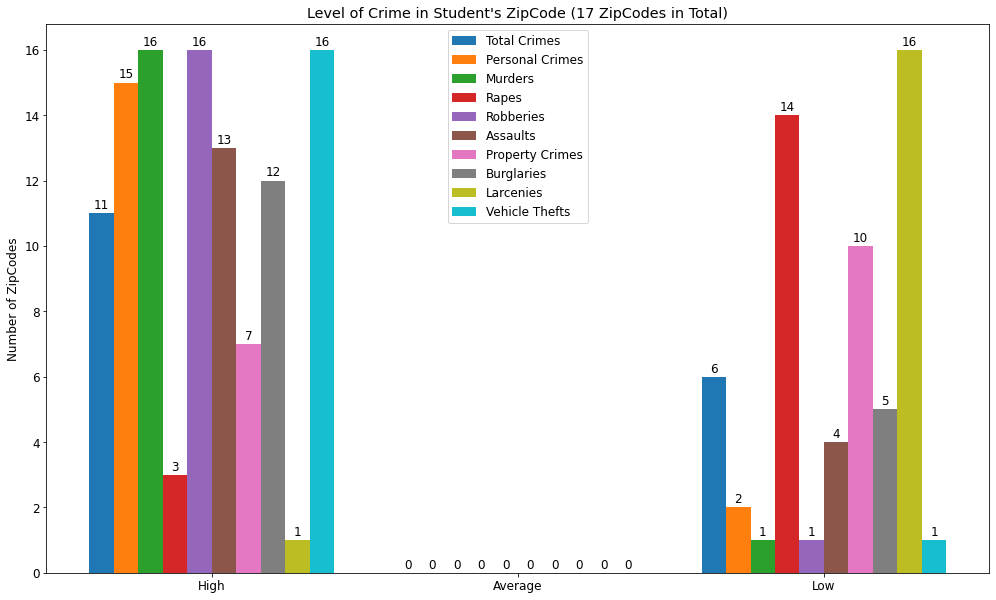

In [ ]:
# Level of Crime in Student's ZipCode
categories = ["High", "Average", "Low"]

# Label Locations
x = np.arange(len(categories))

# Width of the Bars
width = 0.08

## Obtain the Data
### Total Crimes
TotalCrimesInfo = manyLabels(Student_ZIP_df.Student_TotalCrimesCateg, categories)
TotalCrimes_labels = TotalCrimesInfo[1]
TotalCrimes_counts = TotalCrimesInfo[0]

### Personal Crimes
PersonalCrimesInfo = manyLabels(Student_ZIP_df.Student_PersonalCrimesCateg, categories)
PersonalCrimes_labels = PersonalCrimesInfo[1]
PersonalCrimes_counts = PersonalCrimesInfo[0]

### Murders
MurdersInfo = manyLabels(Student_ZIP_df.Student_MurdersCateg, categories)
Murders_labels = MurdersInfo[1]
Murders_counts = MurdersInfo[0]

### Rapes
RapesInfo = manyLabels(Student_ZIP_df.Student_RapesCateg, categories)
Rapes_labels = RapesInfo[1]
Rapes_counts = RapesInfo[0]

### Robberies
RobberiesInfo = manyLabels(Student_ZIP_df.Student_RobberiesCateg, categories)
Robberies_labels = RobberiesInfo[1]
Robberies_counts = RobberiesInfo[0]

### Assaults
AssaultsInfo = manyLabels(Student_ZIP_df.Student_AssaultsCateg, categories)
Assaults_labels = AssaultsInfo[1]
Assaults_counts = AssaultsInfo[0]

### Property Crimes
PropertyCrimesInfo = manyLabels(Student_ZIP_df.Student_PropertyCrimesCateg, categories)
PropertyCrimes_labels = PropertyCrimesInfo[1]
PropertyCrimes_counts = PropertyCrimesInfo[0]

### Burglaries
BurglariesInfo = manyLabels(Student_ZIP_df.Student_BurglariesCateg, categories)
Burglaries_labels = BurglariesInfo[1]
Burglaries_counts = BurglariesInfo[0]

### Larcenies
LarceniesInfo = manyLabels(Student_ZIP_df.Student_LarceniesCateg, categories)
Larcenies_labels = LarceniesInfo[1]
Larcenies_counts = LarceniesInfo[0]

### Vehicle Thefts
VehicleTheftsInfo = manyLabels(Student_ZIP_df.Student_VehicleTheftsCateg, categories)
VehicleThefts_labels = VehicleTheftsInfo[1]
VehicleThefts_counts = VehicleTheftsInfo[0]


## Create the Chart
plt.bar(x - (9 * (width/2)), TotalCrimes_counts, width, label="Total Crimes")
plt.bar(x - (7 * (width/2)), PersonalCrimes_counts, width, label="Personal Crimes")
plt.bar(x - (5 * (width/2)), Murders_counts, width, label="Murders")
plt.bar(x - (3 * (width/2)), Rapes_counts, width, label="Rapes")
plt.bar(x - width/2, Robberies_counts, width, label="Robberies")
plt.bar(x + width/2, Assaults_counts, width, label="Assaults")
plt.bar(x + (3 * (width/2)), PropertyCrimes_counts, width, label="Property Crimes")
plt.bar(x + (5 * (width/2)), Burglaries_counts, width, label="Burglaries")
plt.bar(x + (7 * (width/2)), Larcenies_counts, width, label="Larcenies")
plt.bar(x + (9 * (width/2)), VehicleThefts_counts, width, label="Vehicle Thefts")

plt.title("Level of Crime in Student's ZipCode (17 ZipCodes in Total)")
plt.ylabel("Number of ZipCodes")
plt.xticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(x[i] - (9 * (width/2)), TotalCrimes_counts[i] + 0.25, TotalCrimes_counts[i], ha="center", va="center")
    plt.text(x[i] - (7 * (width/2)), PersonalCrimes_counts[i] + 0.25, PersonalCrimes_counts[i], ha="center", va="center")
    plt.text(x[i] - (5 * (width/2)), Murders_counts[i] + 0.25, Murders_counts[i], ha="center", va="center")
    plt.text(x[i] - (3 * (width/2)), Rapes_counts[i] + 0.25, Rapes_counts[i], ha="center", va="center")
    plt.text(x[i] - width/2, Robberies_counts[i] + 0.25, Robberies_counts[i], ha="center", va="center")
    plt.text(x[i] + width/2, Assaults_counts[i] + 0.25, Assaults_counts[i], ha="center", va="center")
    plt.text(x[i] + (3 * (width/2)), PropertyCrimes_counts[i] + 0.25, PropertyCrimes_counts[i], ha="center", va="center")
    plt.text(x[i] + (5 * (width/2)), Burglaries_counts[i] + 0.25, Burglaries_counts[i], ha="center", va="center")
    plt.text(x[i] + (7 * (width/2)), Larcenies_counts[i] + 0.25, Larcenies_counts[i], ha="center", va="center")
    plt.text(x[i] + (9 * (width/2)), VehicleThefts_counts[i] + 0.25, VehicleThefts_counts[i], ha="center", va="center")

plt.legend(loc="upper center")
plt.tight_layout()
plt.show()

#### <font color=darkviolet>Continuous</font>

##### <font color=mediumorchid>Histograms</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Decrease the Size of the Plots
plt.rcParams["figure.figsize"] = (8,5.5)

# Increase the Font Size of the Plots
plt.rcParams.update({'font.size': 16})

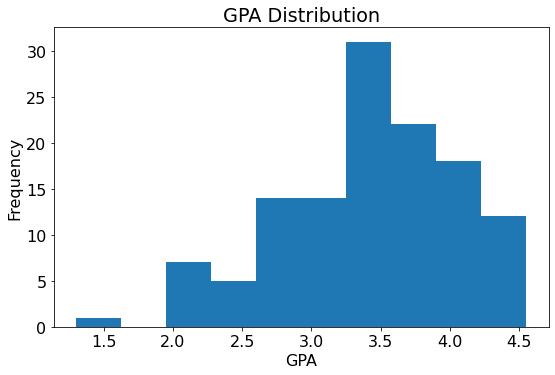

In [ ]:
# GPA
## Obtain the Data
GPAInfo = eda_df.GPA

# Compute the Optimal Number of Bins
nbins_GPA = computeNumberofBins(GPAInfo)


## Create the Chart
plt.hist(GPAInfo, bins=nbins_GPA)
plt.title("GPA Distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

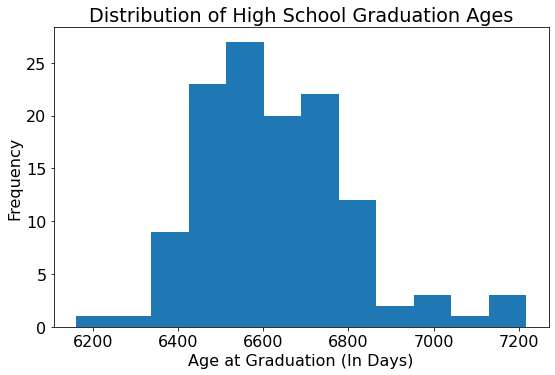

In [ ]:
# Age at High School Graduation
## Obtain the Data
HSGrad_AgeInfo = eda_df.HSGrad_Age

# Compute the Optimal Number of Bins
nbins_HSGradAge = computeNumberofBins(HSGrad_AgeInfo)


## Create the Chart
plt.hist(HSGrad_AgeInfo, bins=nbins_HSGradAge)
plt.title("Distribution of High School Graduation Ages")
plt.xlabel("Age at Graduation (In Days)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

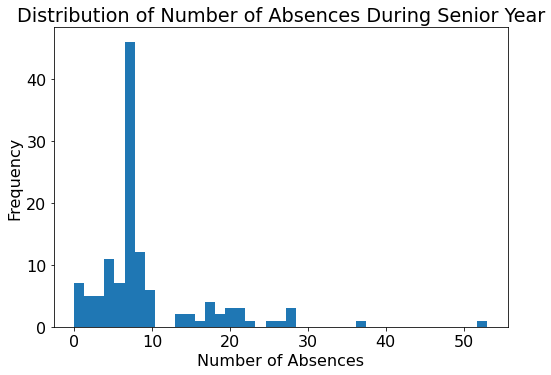

In [ ]:
# Number of Absences
## Obtain the Data
AbsencesInfo = eda_df.Absences

# Compute the Optimal Number of Bins
nbins_Absences = computeNumberofBins(AbsencesInfo)


## Create the Chart
plt.hist(AbsencesInfo, bins=nbins_Absences)
plt.title("Distribution of Number of Absences During Senior Year")
plt.xlabel("Number of Absences")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

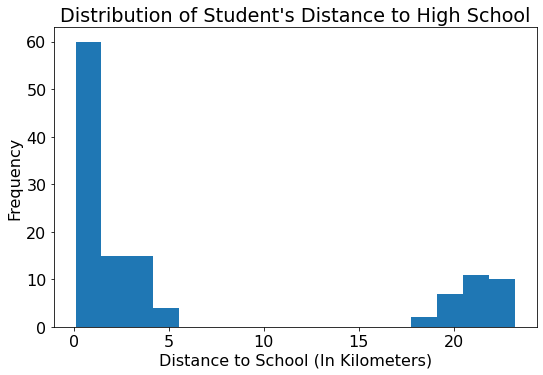

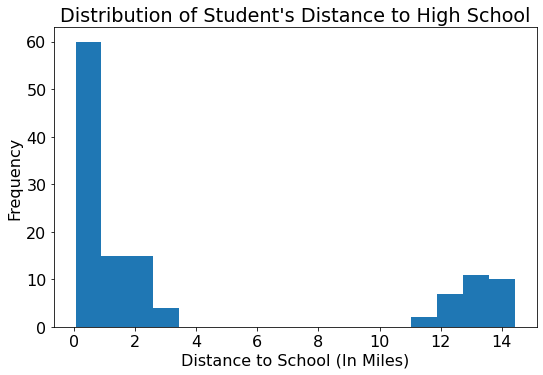

In [ ]:
# Distance to High School
## Obtain the Data
HS_DistInfo = eda_df.Distance_to_HS
HS_DistMiles = HS_DistInfo.transform(lambda x: x/(1.609344))

# Compute the Optimal Number of Bins
nbins_HS_Dist = computeNumberofBins(HS_DistInfo)


## Create the First Chart
plt.hist(HS_DistInfo, bins=nbins_HS_Dist)
plt.title("Distribution of Student's Distance to High School")
plt.xlabel("Distance to School (In Kilometers)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Create the Second Chart
plt.hist(HS_DistMiles, bins=nbins_HS_Dist)
plt.title("Distribution of Student's Distance to High School")
plt.xlabel("Distance to School (In Miles)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (12,5.5)

# Decrease the Font Size of the Plots
plt.rcParams.update({'font.size': 14})

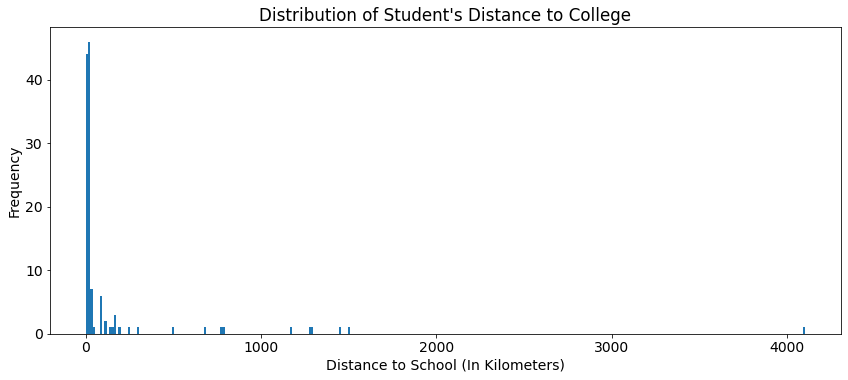

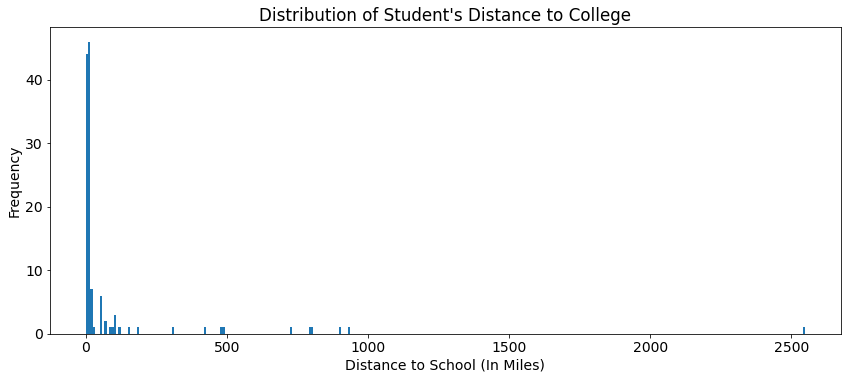

In [ ]:
# Distance to College
## Obtain the Data
PS_DistInfo = eda_df.Distance_to_PS
PS_DistMiles = PS_DistInfo.transform(lambda x: x/(1.609344))

# Compute the Optimal Number of Bins
nbins_PS_Dist = computeNumberofBins(PS_DistInfo)


## Create the First Chart
plt.hist(PS_DistInfo, bins=nbins_PS_Dist)
plt.title("Distribution of Student's Distance to College")
plt.xlabel("Distance to School (In Kilometers)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Create the Second Chart
plt.hist(PS_DistMiles, bins=nbins_PS_Dist)
plt.title("Distribution of Student's Distance to College")
plt.xlabel("Distance to School (In Miles)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

##### <font color=mediumorchid>Box Plots</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (8,8.5)

# Decrease the Font Size of the Plots
plt.rcParams.update({'font.size': 14})

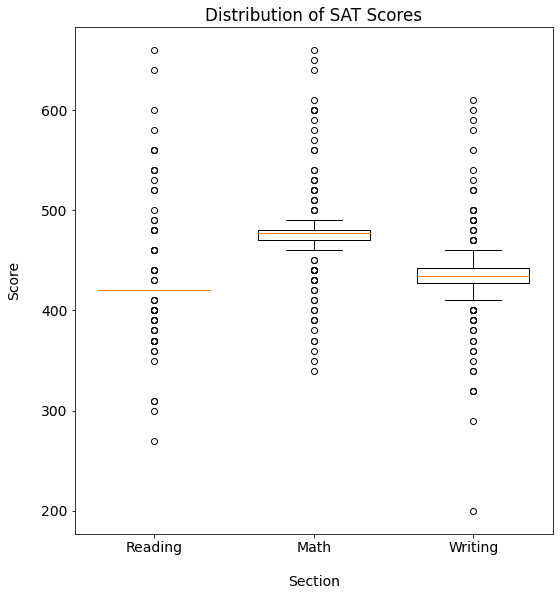

In [ ]:
## Obtain the Data
SAT_ReadingInfo = eda_df.SAT_Reading
SAT_MathInfo = eda_df.SAT_Math
SAT_WritingInfo = eda_df.SAT_Writing

dataset = [SAT_ReadingInfo, SAT_MathInfo, SAT_WritingInfo]

categories = ["Reading", "Math", "Writing"]


## Create the Chart
plt.boxplot(dataset, widths=0.7, labels=categories)
plt.title("Distribution of SAT Scores")
plt.xlabel("Section", labelpad=20)
plt.ylabel("Score", labelpad=20)
plt.tight_layout()
plt.show()

##### <font color=mediumorchid>Bar Charts</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (12,6.5)

# Maintain the Font Size of the Plots
plt.rcParams.update({'font.size': 14})

In [ ]:
# Create a List of Lists
## We Will Use This to Create the HS DataFrame
HS_Info = list()

# Extract One Row for Each High School
## The School Information Is Constant for All Instances
for school in set(eda_df.HS_SchoolName.values):
    # Mask the DataFrame and Extract the First Row
    df = eda_df[eda_df.HS_SchoolName == school].iloc[0]
    
    # Append the Row's Values to HS_ZIP_Info
    HS_Info.append(df.values)
    
# Create the DataFrame
HS_df = pd.DataFrame(HS_Info, columns=eda_df.columns.values)

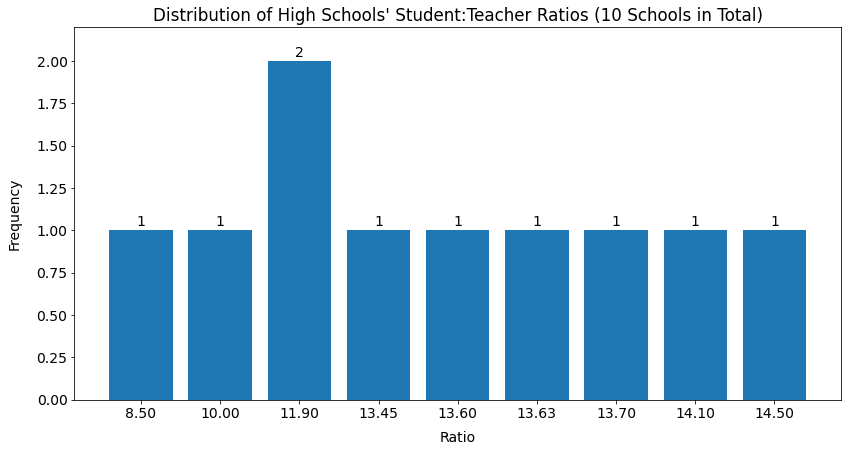

In [ ]:
# Student to Teacher Ratio
## Obtain the Data
studentTeacherRatioInfo = continuousBars(HS_df.StudentTeacherRatio)

labels = studentTeacherRatioInfo[1]
counts = studentTeacherRatioInfo[0]


## Create the Chart
plt.bar(labels, counts)
plt.title("Distribution of High Schools' Student:Teacher Ratios (10 Schools in Total)")
plt.xlabel("Ratio", labelpad=10)
plt.ylabel("Frequency", labelpad=15)
plt.ylim(top=2.2)

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(labels[i], counts[i] + 0.05, counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

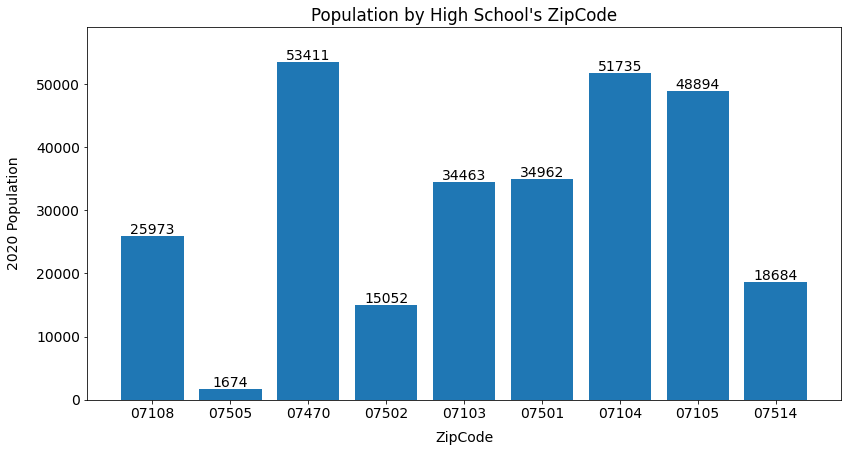

In [ ]:
# Population in High School's ZipCode
## Obtain the Data
HSPopulationInfo = areaAndPopulationBars(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_AreaPopulation_2020"]])

labels = HSPopulationInfo[1]
counts = HSPopulationInfo[0]


## Create the Chart
plt.bar(labels, counts)
plt.title("Population by High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("2020 Population", labelpad=15)
plt.ylim(top=59000)

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(labels[i], counts[i] + 1000, counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (14,6.5)

# Decrease the Font Size of the Plots
plt.rcParams.update({'font.size': 12})

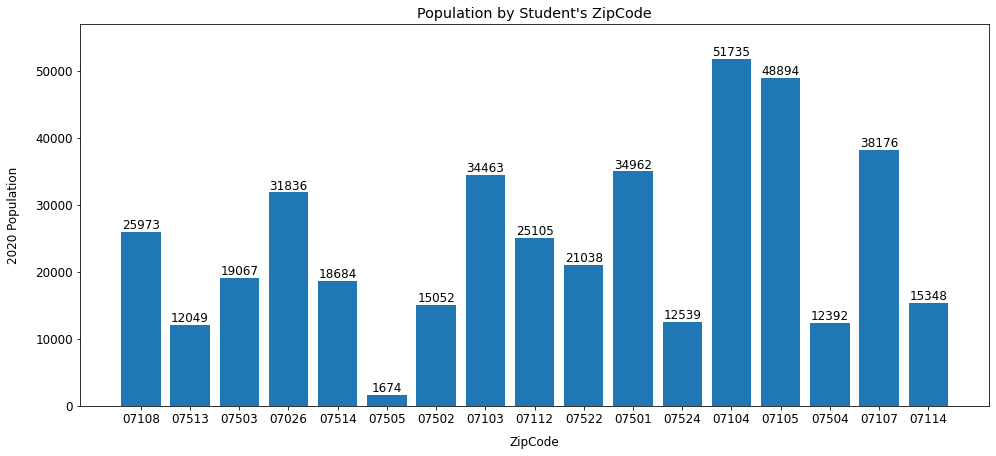

In [ ]:
# Population in Student's ZipCode
## Obtain the Data
StudentPopulationInfo = areaAndPopulationBars(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_AreaPopulation_2020"]])

labels = StudentPopulationInfo[1]
counts = StudentPopulationInfo[0]


## Create the Chart
plt.bar(labels, counts)
plt.title("Population by Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("2020 Population", labelpad=15)
plt.ylim(top=57000)

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(labels[i], counts[i] + 1000, counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Decrease the Size of the Plots
plt.rcParams["figure.figsize"] = (12,8.5)

# Increase the Font Size of the Plots
plt.rcParams.update({'font.size': 14})

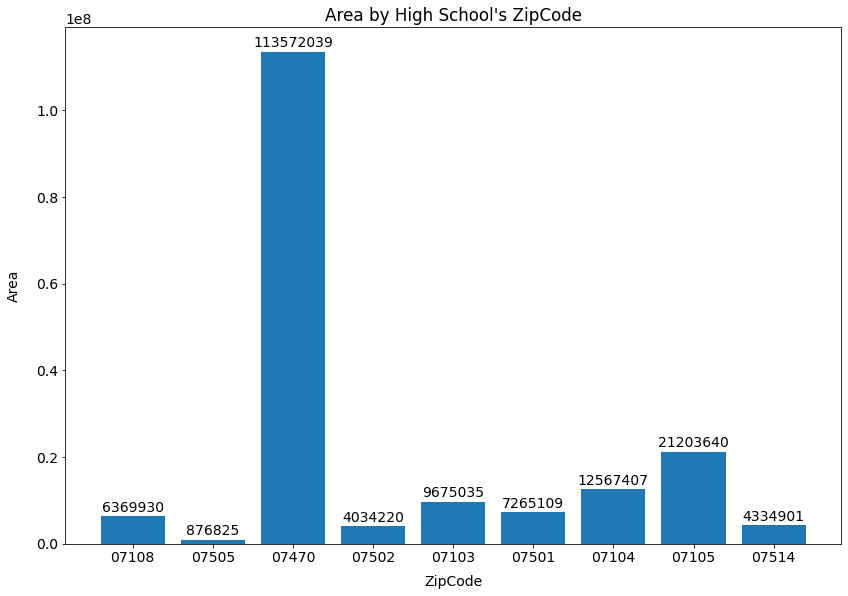

In [ ]:
# Area in High School's ZipCode
## Obtain the Data
HSAreaInfo = areaAndPopulationBars(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_Area"]])

labels = HSAreaInfo[1]
counts = HSAreaInfo[0]


## Create the Chart
plt.bar(labels, counts)
plt.title("Area by High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Area", labelpad=15)

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(labels[i], counts[i] + 2000000, counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (14,8.5)

# Decrease the Font Size of the Plots
plt.rcParams.update({'font.size': 11})

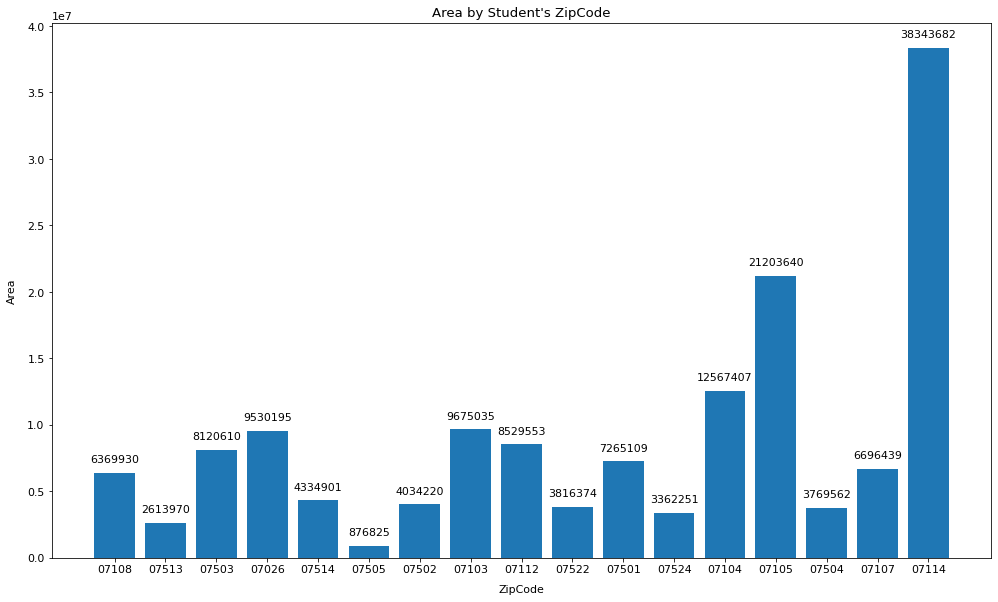

In [ ]:
# Area in Student's ZipCode
## Obtain the Data
StudentAreaInfo = areaAndPopulationBars(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_Area"]])

labels = StudentAreaInfo[1]
counts = StudentAreaInfo[0]


## Create the Chart
plt.bar(labels, counts)
plt.title("Area by Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Area", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(labels)):
    plt.text(labels[i], counts[i] + 1000000, counts[i], ha="center", va="center")
    
plt.tight_layout()
plt.show()

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Maintain the Size of the Plots
plt.rcParams["figure.figsize"] = (14,8.5)

# Increase the Font Size of the Plots
plt.rcParams.update({'font.size': 12})

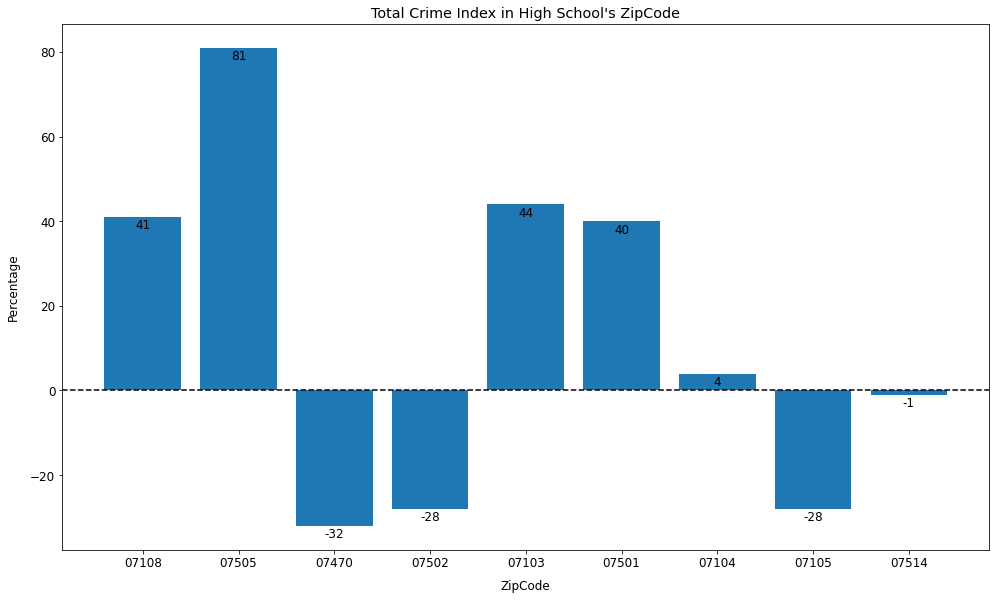

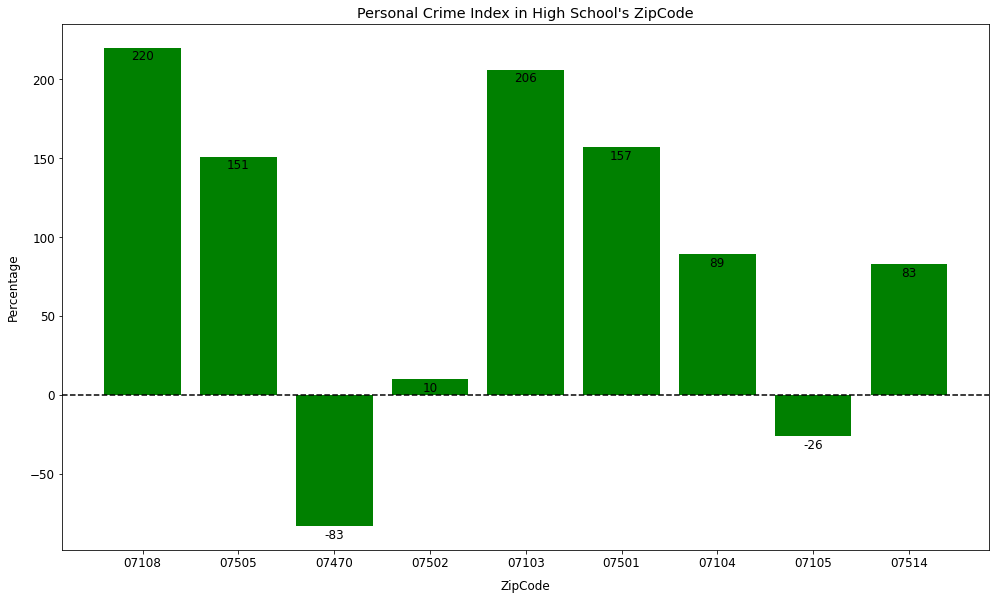

In [ ]:
# Crime Index in High School's ZipCode
# Width of the Bars
width = 0.25

## Obtain the Data
### Total Crimes
TotalCrimesInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_CrimesIndex_2020"]])
TotalCrimes_labels = TotalCrimesInfo[1]
TotalCrimes_counts = TotalCrimesInfo[0]

### Personal Crimes
PersonalCrimesInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_PersonalCrimesIndex_2020"]])
PersonalCrimes_labels = PersonalCrimesInfo[1]
PersonalCrimes_counts = PersonalCrimesInfo[0]

### Murders
MurdersInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_MurdersIndex_2020"]])
Murders_labels = MurdersInfo[1]
Murders_counts = MurdersInfo[0]

### Rapes
RapesInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_RapesIndex_2020"]])
Rapes_labels = RapesInfo[1]
Rapes_counts = RapesInfo[0]

### Robberies
RobberiesInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_RobberiesIndex_2020"]])
Robberies_labels = RobberiesInfo[1]
Robberies_counts = RobberiesInfo[0]

### Assaults
AssaultsInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_AssaultsIndex_2020"]])
Assaults_labels = AssaultsInfo[1]
Assaults_counts = AssaultsInfo[0]

### Property Crimes
PropertyCrimesInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_PropertyCrimesIndex_2020"]])
PropertyCrimes_labels = PropertyCrimesInfo[1]
PropertyCrimes_counts = PropertyCrimesInfo[0]

### Burglaries
BurglariesInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_BurglariesIndex_2020"]])
Burglaries_labels = BurglariesInfo[1]
Burglaries_counts = BurglariesInfo[0]

### Larcenies
LarceniesInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_LarceniesIndex_2020"]])
Larcenies_labels = LarceniesInfo[1]
Larcenies_counts = LarceniesInfo[0]

### Vehicle Thefts
VehicleTheftsInfo = computeCrimePercentage(HS_ZIP_df.loc[:, ["HS_ZIP", "HS_VehicleTheftsIndex_2020"]])
VehicleThefts_labels = VehicleTheftsInfo[1]
VehicleThefts_counts = VehicleTheftsInfo[0]


## Create the First Chart
plt.bar(TotalCrimes_labels, TotalCrimes_counts)
plt.title("Total Crime Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(TotalCrimes_labels)):
    plt.text(TotalCrimes_labels[i], TotalCrimes_counts[i] - 2, TotalCrimes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Second Chart
plt.bar(PersonalCrimes_labels, PersonalCrimes_counts, color="g")
plt.title("Personal Crime Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(PersonalCrimes_labels)):
    plt.text(PersonalCrimes_labels[i], PersonalCrimes_counts[i] - 5.5, PersonalCrimes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

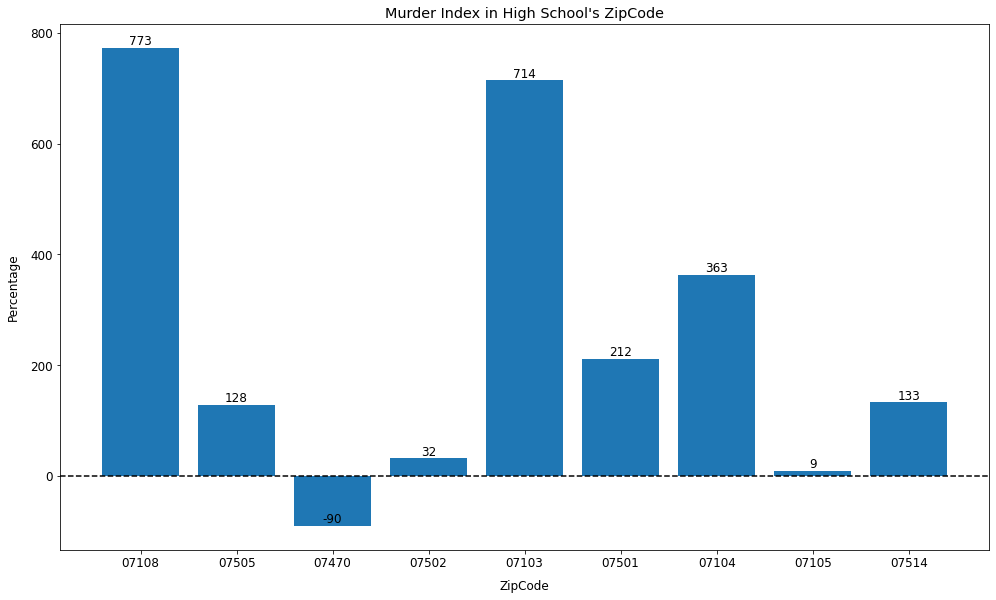

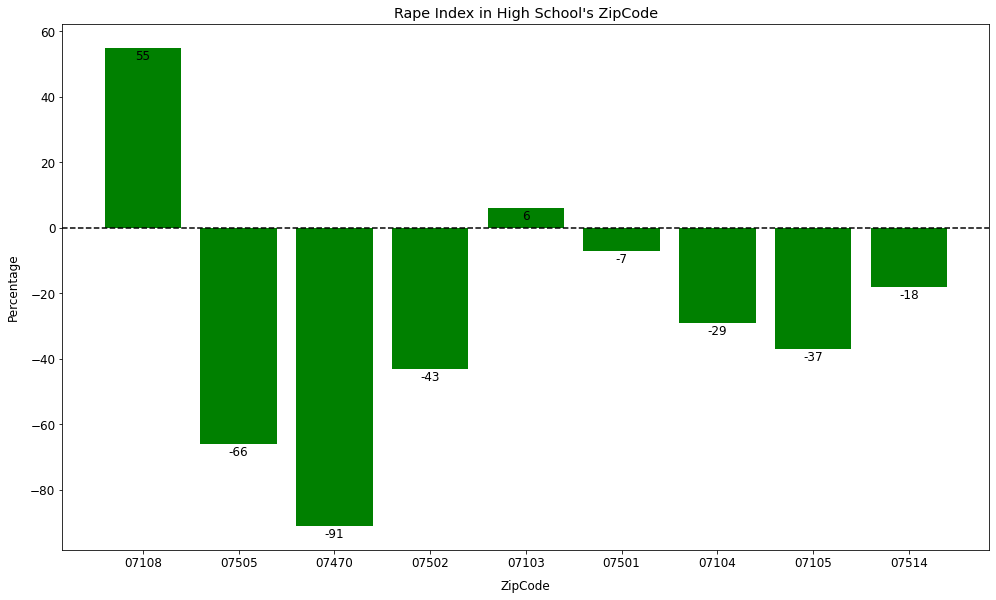

In [ ]:
## Create the Third Chart
plt.bar(Murders_labels, Murders_counts)
plt.title("Murder Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Murders_labels)):
    plt.text(Murders_labels[i], Murders_counts[i] + 12, Murders_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Fourth Chart
plt.bar(Rapes_labels, Rapes_counts, color="g")
plt.title("Rape Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Rapes_labels)):
    plt.text(Rapes_labels[i], Rapes_counts[i] - 2.5, Rapes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

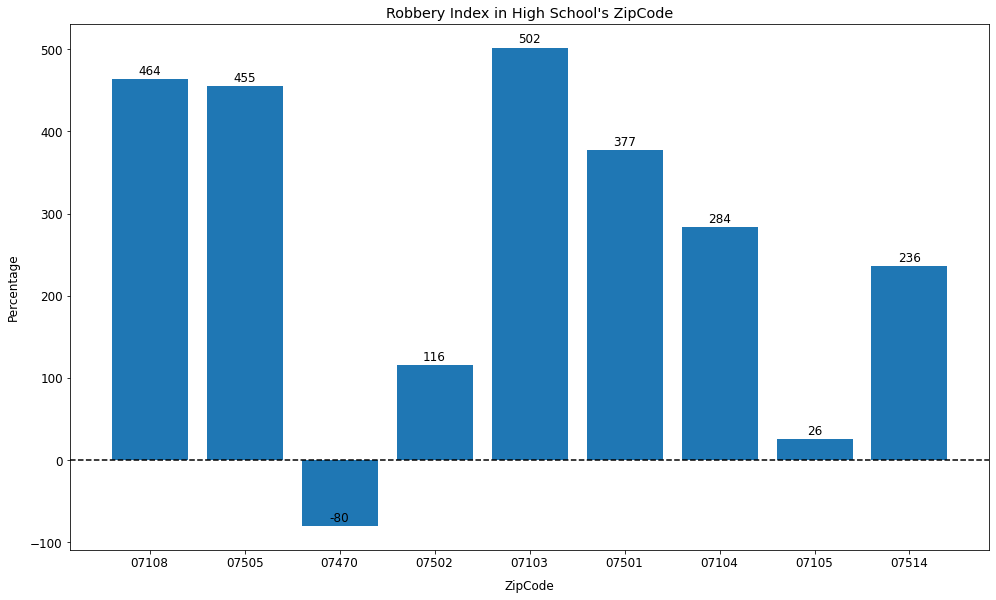

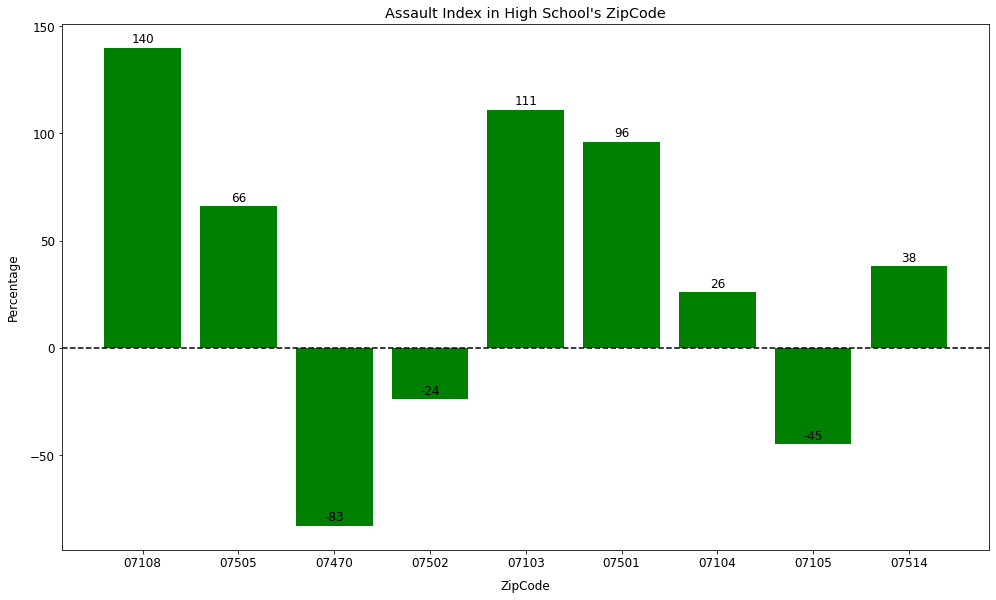

In [ ]:
## Create the Fifth Chart
plt.bar(Robberies_labels, Robberies_counts)
plt.title("Robbery Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Robberies_labels)):
    plt.text(Robberies_labels[i], Robberies_counts[i] + 10, Robberies_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Sixth Chart
plt.bar(Assaults_labels, Assaults_counts, color="g")
plt.title("Assault Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Assaults_labels)):
    plt.text(Assaults_labels[i], Assaults_counts[i] + 4, Assaults_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

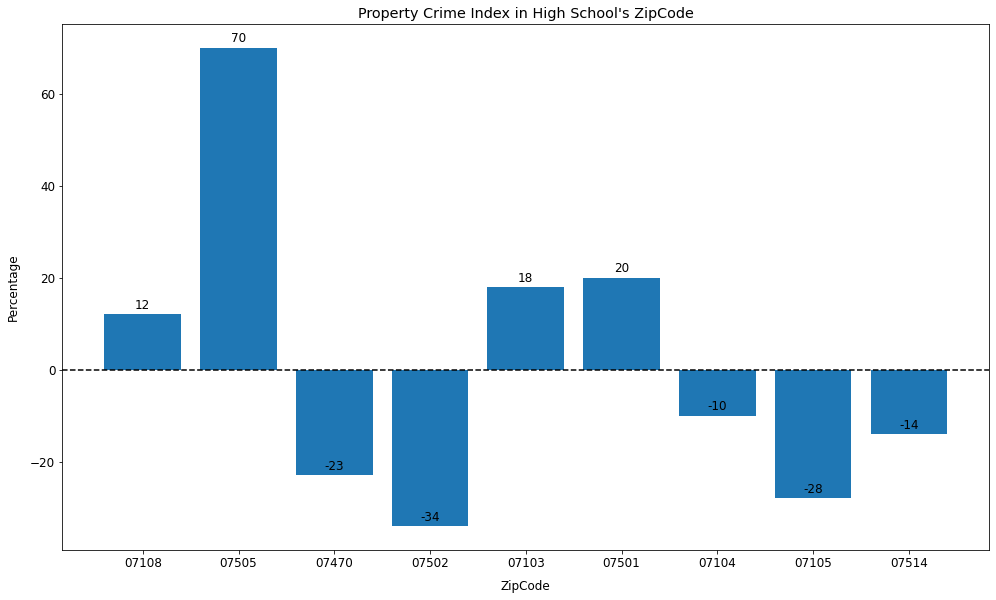

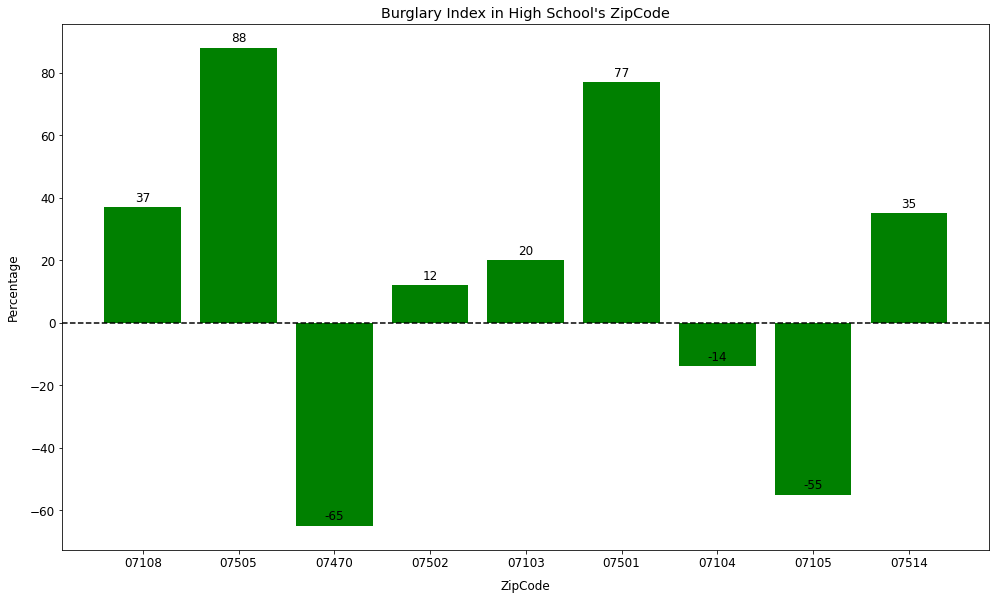

In [ ]:
## Create the Seventh Chart
plt.bar(PropertyCrimes_labels, PropertyCrimes_counts)
plt.title("Property Crime Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(PropertyCrimes_labels)):
    plt.text(PropertyCrimes_labels[i], PropertyCrimes_counts[i] + 2, PropertyCrimes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Eighth Chart
plt.bar(Burglaries_labels, Burglaries_counts, color="g")
plt.title("Burglary Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Burglaries_labels)):
    plt.text(Burglaries_labels[i], Burglaries_counts[i] + 3, Burglaries_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

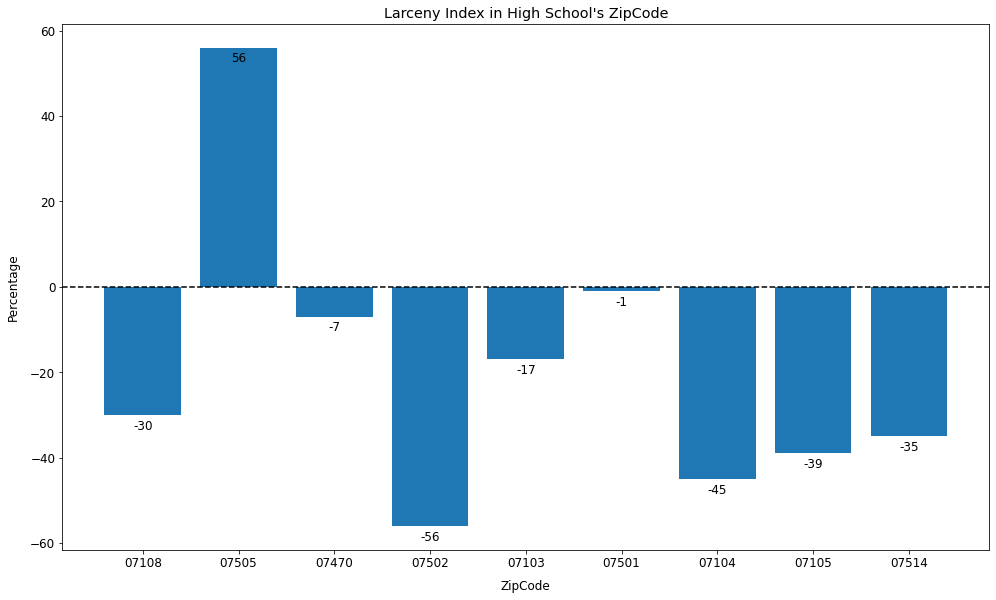

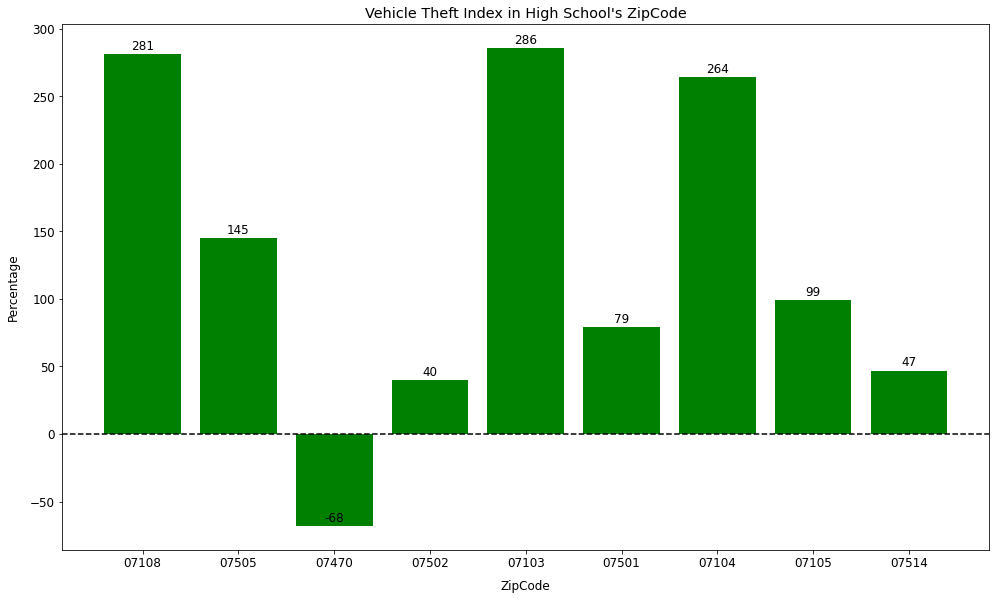

In [ ]:
## Create the Ninth Chart
plt.bar(Larcenies_labels, Larcenies_counts)
plt.title("Larceny Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Larcenies_labels)):
    plt.text(Larcenies_labels[i], Larcenies_counts[i] - 2.5, Larcenies_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Tenth Chart
plt.bar(VehicleThefts_labels, VehicleThefts_counts, color="g")
plt.title("Vehicle Theft Index in High School's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(VehicleThefts_labels)):
    plt.text(VehicleThefts_labels[i], VehicleThefts_counts[i] + 6, VehicleThefts_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

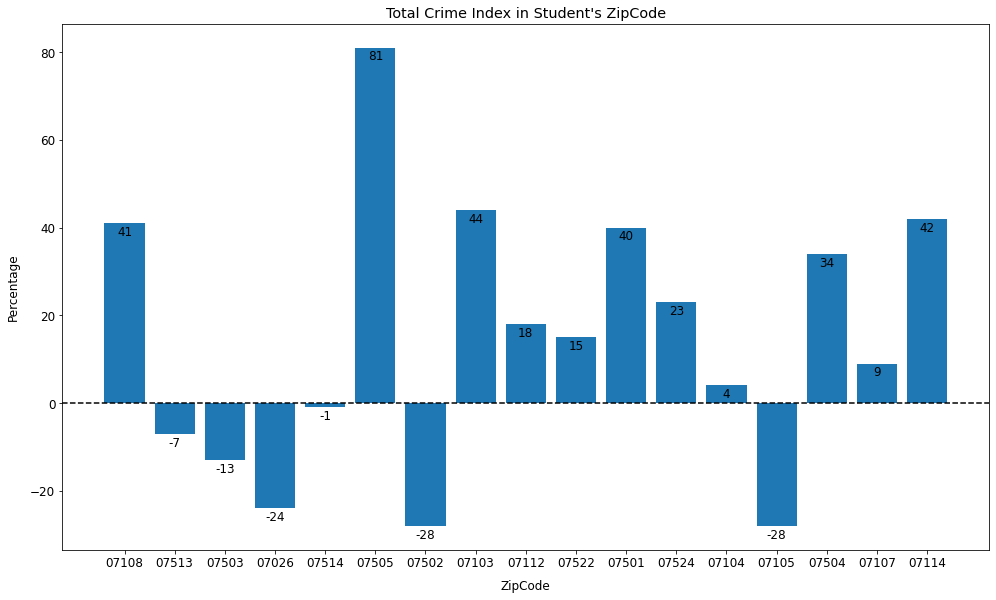

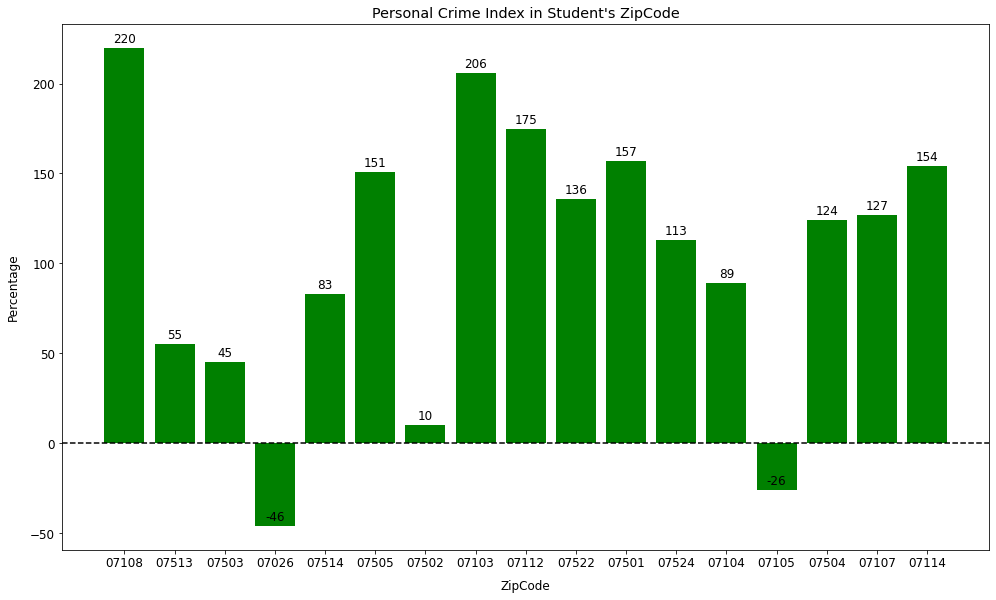

In [ ]:
# Crime Index in Student's ZipCode
# Width of the Bars
width = 0.25

## Obtain the Data
### Total Crimes
TotalCrimesInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_CrimesIndex_2020"]])
TotalCrimes_labels = TotalCrimesInfo[1]
TotalCrimes_counts = TotalCrimesInfo[0]

### Personal Crimes
PersonalCrimesInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_PersonalCrimesIndex_2020"]])
PersonalCrimes_labels = PersonalCrimesInfo[1]
PersonalCrimes_counts = PersonalCrimesInfo[0]

### Murders
MurdersInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_MurdersIndex_2020"]])
Murders_labels = MurdersInfo[1]
Murders_counts = MurdersInfo[0]

### Rapes
RapesInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_RapesIndex_2020"]])
Rapes_labels = RapesInfo[1]
Rapes_counts = RapesInfo[0]

### Robberies
RobberiesInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_RobberiesIndex_2020"]])
Robberies_labels = RobberiesInfo[1]
Robberies_counts = RobberiesInfo[0]

### Assaults
AssaultsInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_AssaultsIndex_2020"]])
Assaults_labels = AssaultsInfo[1]
Assaults_counts = AssaultsInfo[0]

### Property Crimes
PropertyCrimesInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_PropertyCrimesIndex_2020"]])
PropertyCrimes_labels = PropertyCrimesInfo[1]
PropertyCrimes_counts = PropertyCrimesInfo[0]

### Burglaries
BurglariesInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_BurglariesIndex_2020"]])
Burglaries_labels = BurglariesInfo[1]
Burglaries_counts = BurglariesInfo[0]

### Larcenies
LarceniesInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_LarceniesIndex_2020"]])
Larcenies_labels = LarceniesInfo[1]
Larcenies_counts = LarceniesInfo[0]

### Vehicle Thefts
VehicleTheftsInfo = computeCrimePercentage(Student_ZIP_df.loc[:, ["Student_ZIP", "Student_VehicleTheftsIndex_2020"]])
VehicleThefts_labels = VehicleTheftsInfo[1]
VehicleThefts_counts = VehicleTheftsInfo[0]


## Create the First Chart
plt.bar(TotalCrimes_labels, TotalCrimes_counts)
plt.title("Total Crime Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(TotalCrimes_labels)):
    plt.text(TotalCrimes_labels[i], TotalCrimes_counts[i] - 2, TotalCrimes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Second Chart
plt.bar(PersonalCrimes_labels, PersonalCrimes_counts, color="g")
plt.title("Personal Crime Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(PersonalCrimes_labels)):
    plt.text(PersonalCrimes_labels[i], PersonalCrimes_counts[i] + 5, PersonalCrimes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

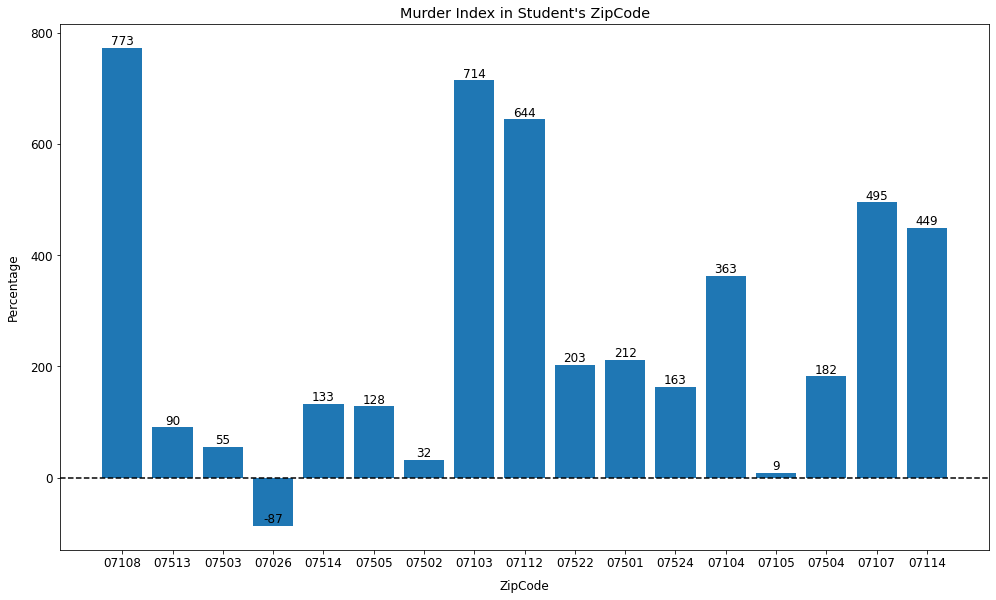

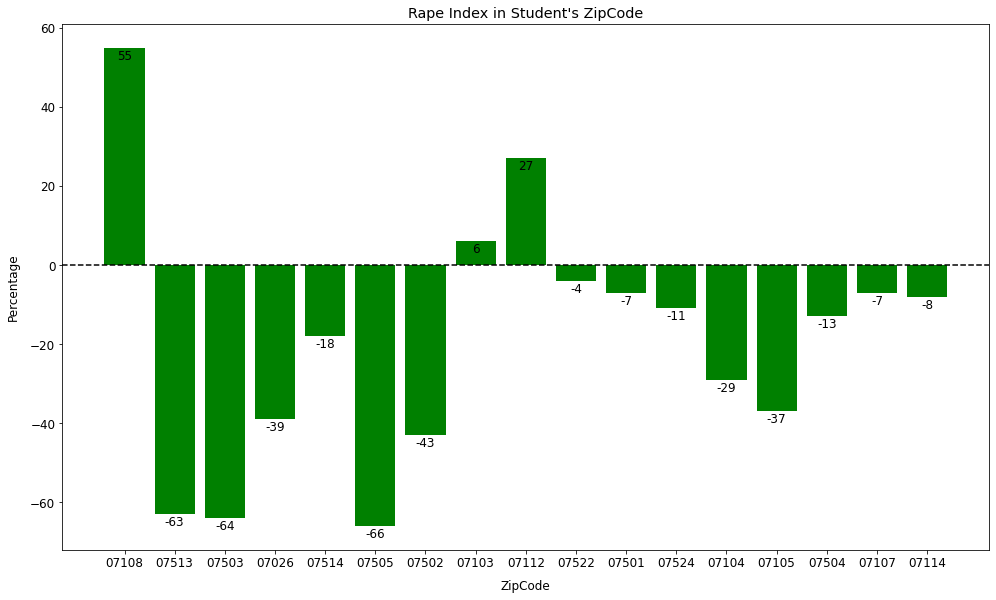

In [ ]:
## Create the Third Chart
plt.bar(Murders_labels, Murders_counts)
plt.title("Murder Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Murders_labels)):
    plt.text(Murders_labels[i], Murders_counts[i] + 12, Murders_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Fourth Chart
plt.bar(Rapes_labels, Rapes_counts, color="g")
plt.title("Rape Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Rapes_labels)):
    plt.text(Rapes_labels[i], Rapes_counts[i] - 2, Rapes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

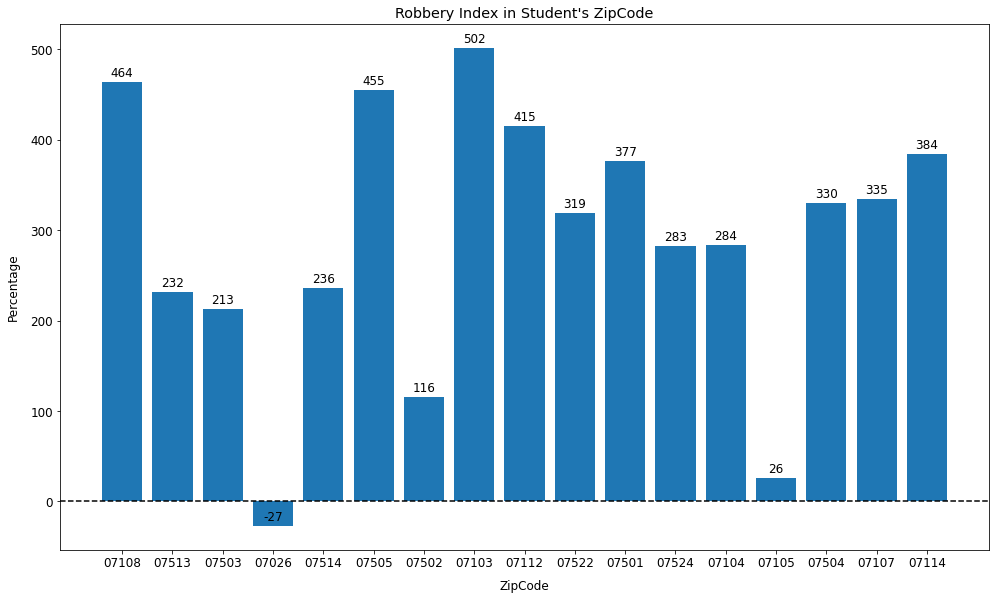

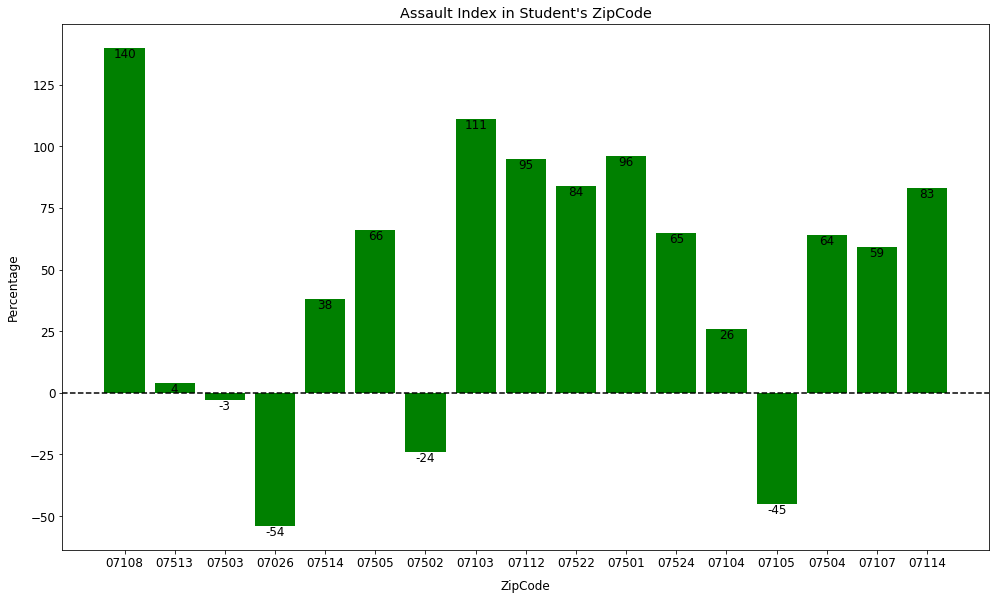

In [ ]:
## Create the Fifth Chart
plt.bar(Robberies_labels, Robberies_counts)
plt.title("Robbery Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Robberies_labels)):
    plt.text(Robberies_labels[i], Robberies_counts[i] + 10, Robberies_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Sixth Chart
plt.bar(Assaults_labels, Assaults_counts, color="g")
plt.title("Assault Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Assaults_labels)):
    plt.text(Assaults_labels[i], Assaults_counts[i] - 2.5, Assaults_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

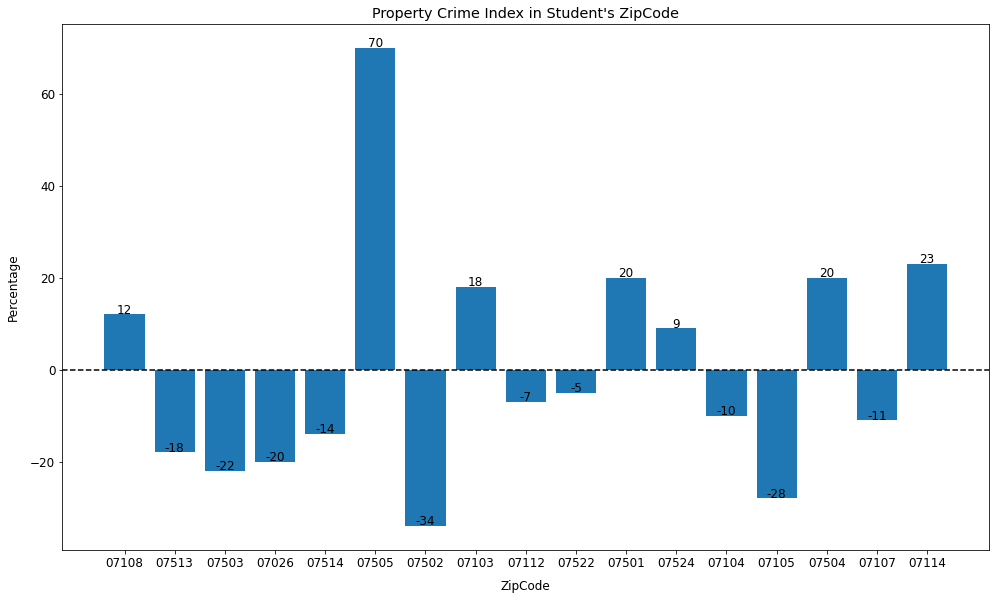

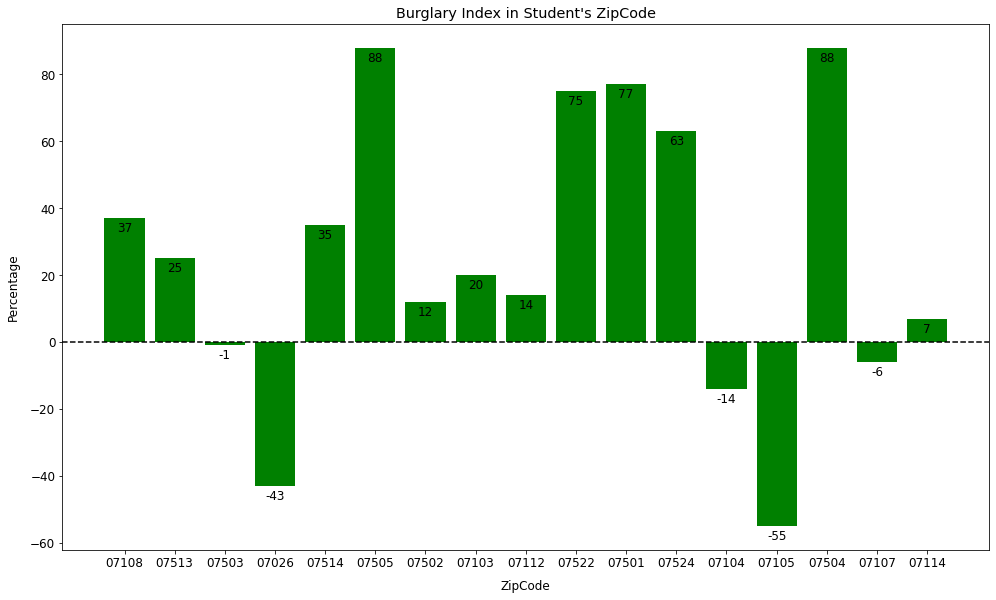

In [ ]:
## Create the Seventh Chart
plt.bar(PropertyCrimes_labels, PropertyCrimes_counts)
plt.title("Property Crime Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(PropertyCrimes_labels)):
    plt.text(PropertyCrimes_labels[i], PropertyCrimes_counts[i] + 1, PropertyCrimes_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Eighth Chart
plt.bar(Burglaries_labels, Burglaries_counts, color="g")
plt.title("Burglary Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Burglaries_labels)):
    plt.text(Burglaries_labels[i], Burglaries_counts[i] - 3, Burglaries_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

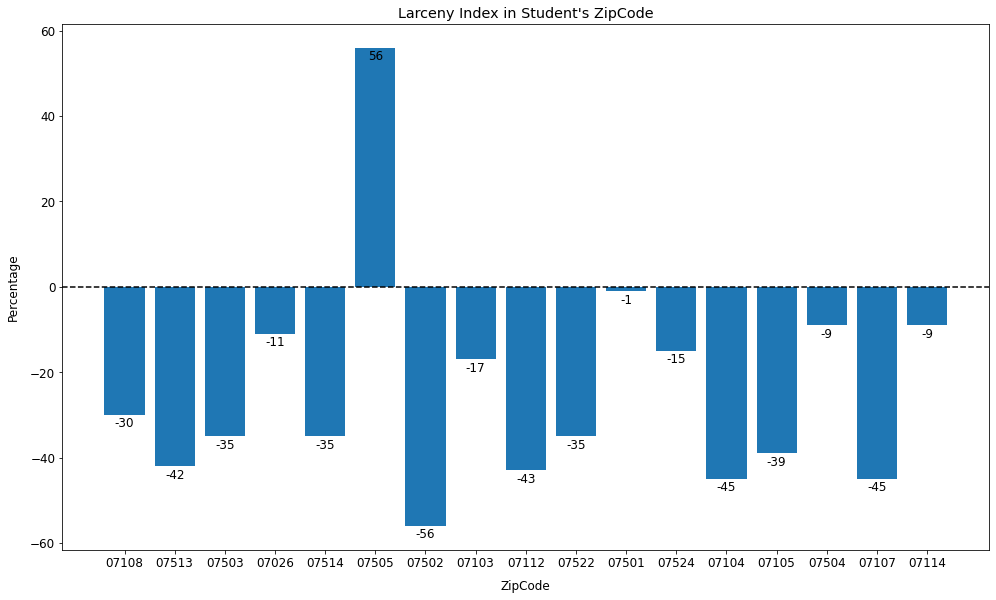

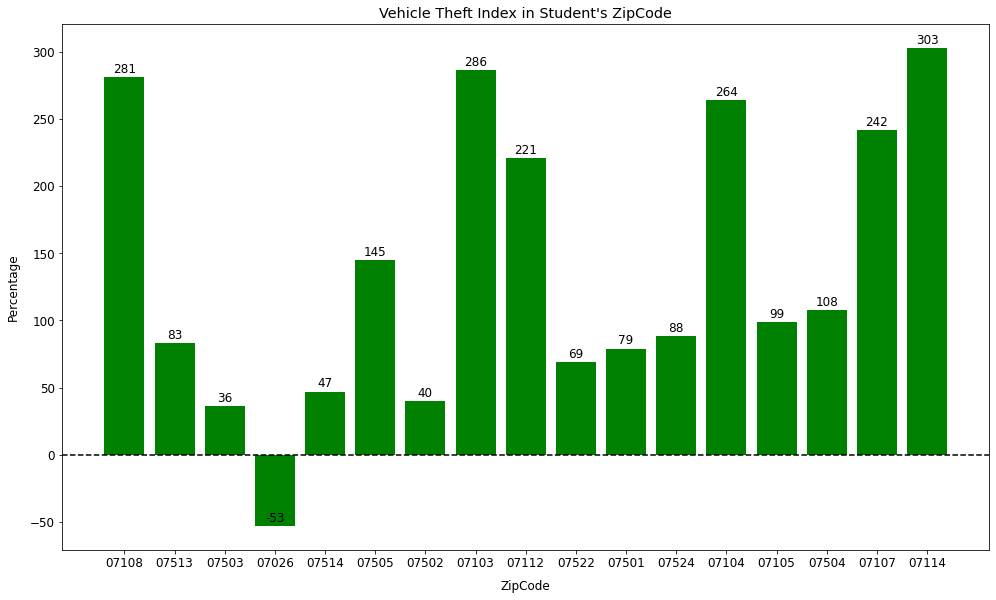

In [ ]:
## Create the Ninth Chart
plt.bar(Larcenies_labels, Larcenies_counts)
plt.title("Larceny Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(Larcenies_labels)):
    plt.text(Larcenies_labels[i], Larcenies_counts[i] - 2, Larcenies_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()


## Create the Tenth Chart
plt.bar(VehicleThefts_labels, VehicleThefts_counts, color="g")
plt.title("Vehicle Theft Index in Student's ZipCode")
plt.xlabel("ZipCode", labelpad=10)
plt.ylabel("Percentage", labelpad=10)

# Add Value Labels for the Bars
for i in range(len(VehicleThefts_labels)):
    plt.text(VehicleThefts_labels[i], VehicleThefts_counts[i] + 6, VehicleThefts_counts[i], ha="center", va="center")

plt.axhline(y=0, color="k", linestyle="--")
plt.tight_layout()
plt.show()

##### <font color=mediumorchid>Stacked Bar Chart</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Maintain the Size of the Plots
plt.rcParams["figure.figsize"] = (14,8.5)

# Increase the Font Size of the Plots
plt.rcParams.update({'font.size': 13})

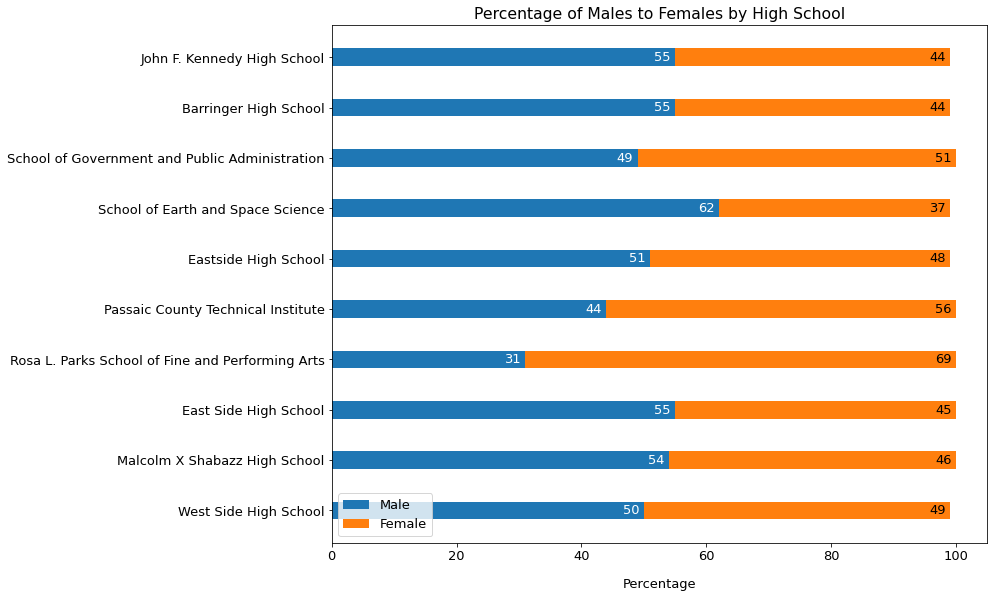

In [ ]:
# Percentage of Males to Females
categories = HS_df["HS_SchoolName"].values

# Label Locations
x = np.arange(len(HS_df))

# Labels
barLabels = ["Male", "Female"]

# Width of the Bars
width = 0.35

## Obtain the Data
### Males
MalesInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_Male"]])
Males_labels = MalesInfo[1]
Males_counts = MalesInfo[0]

### Females
FemalesInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_Female"]])
Females_labels = FemalesInfo[1]
Females_counts = FemalesInfo[0]


## Create the Chart
# Plot the Male Bars for Every School
plt.barh(x, Males_counts, width, label="Male")

# Plot the Female Bars on Top, Starting at the Bottom of the Male Bars
plt.barh(x, Females_counts, width, left=Males_counts, label="Female")

plt.title("Percentage of Males to Females by High School")
plt.xlabel("Percentage", labelpad=15)
plt.yticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(Males_counts[i] - 2, x[i], Males_counts[i], ha="center", va="center", color="w")
    plt.text(Males_counts[i] + Females_counts[i] - 2, x[i], Females_counts[i], ha="center", va="center")

plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

##### <font color=mediumorchid>Grouped Bars Chart</font>

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (14,8.5)

# Decrease the Font Size of the Plots
plt.rcParams.update({'font.size': 10})

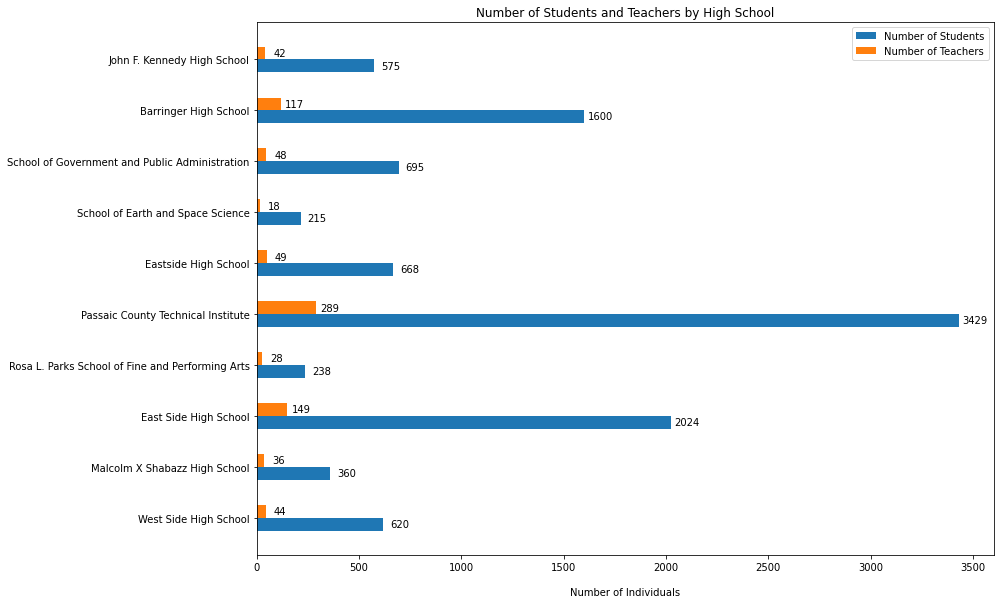

In [ ]:
# Number of Students and Teachers
categories = HS_df["HS_SchoolName"].values

# Label Locations
x = np.arange(len(HS_df))

# Width of the Bars
width = 0.25

## Obtain the Data
### Number of Students
NumStudentsInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "NumStudents"]])
NumStudents_labels = NumStudentsInfo[1]
NumStudents_counts = NumStudentsInfo[0]

### Number of Teachers
NumTeachersInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "NumTeachers"]])
NumTeachers_labels = NumTeachersInfo[1]
NumTeachers_counts = NumTeachersInfo[0]


## Create the Chart
plt.barh(x - width/2, NumStudents_counts, width, label="Number of Students")
plt.barh(x + width/2, NumTeachers_counts, width, label="Number of Teachers")
plt.title("Number of Students and Teachers by High School")
plt.xlabel("Number of Individuals", labelpad=15)
plt.yticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(NumStudents_counts[i] + 80, x[i] - width/2, NumStudents_counts[i], ha="center", va="center")
    plt.text(NumTeachers_counts[i] + 70, x[i] + width/2, NumTeachers_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

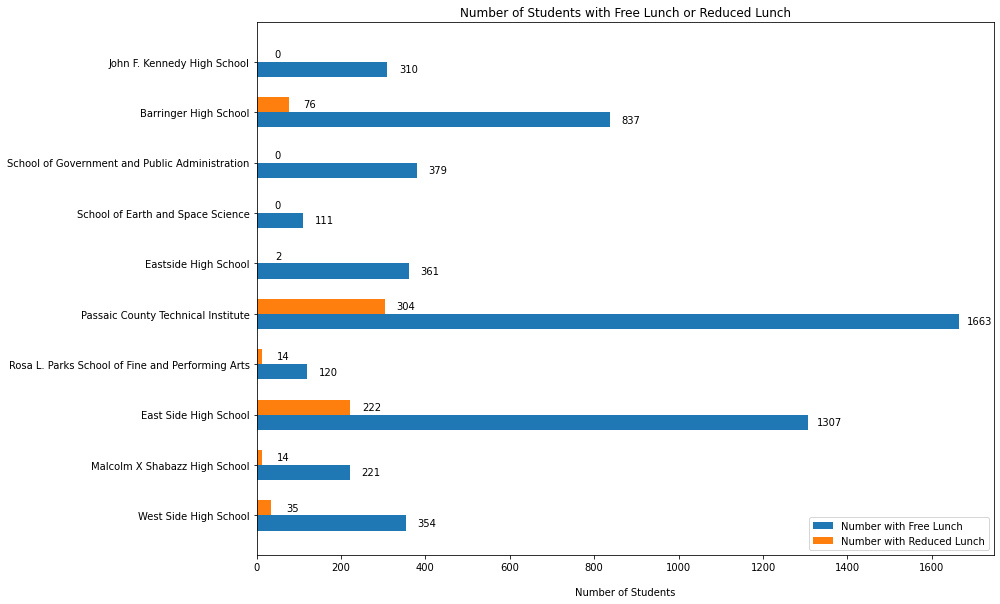

In [ ]:
# Number with Free Lunch and Reduced Lunch
categories = HS_df["HS_SchoolName"].values

# Label Locations
x = np.arange(len(HS_df))

# Width of the Bars
width = 0.3

## Obtain the Data
### Number of Students with Free Lunch
NumFreeInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "NumFreeLunch"]])
NumFree_labels = NumFreeInfo[1]
NumFree_counts = NumFreeInfo[0]

### Number of Students with Reduced Lunch
NumReducedInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "NumReducedLunch"]])
NumReduced_labels = NumReducedInfo[1]
NumReduced_counts = NumReducedInfo[0]


## Create the Chart
plt.barh(x - width/2, NumFree_counts, width, label="Number with Free Lunch")
plt.barh(x + width/2, NumReduced_counts, width, label="Number with Reduced Lunch")
plt.title("Number of Students with Free Lunch or Reduced Lunch")
plt.xlabel("Number of Students", labelpad=15)
plt.yticks(x, categories)

# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(NumFree_counts[i] + 50, x[i] - width/2, NumFree_counts[i], ha="center", va="center")
    plt.text(NumReduced_counts[i] + 50, x[i] + width/2, NumReduced_counts[i], ha="center", va="center")

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

##### <font color=darkturquoise>*Set Chart Size*</font>

In [ ]:
# Increase the Size of the Plots
plt.rcParams["figure.figsize"] = (14,12.5)

# Maintain the Font Size of the Plots
plt.rcParams.update({'font.size': 10})

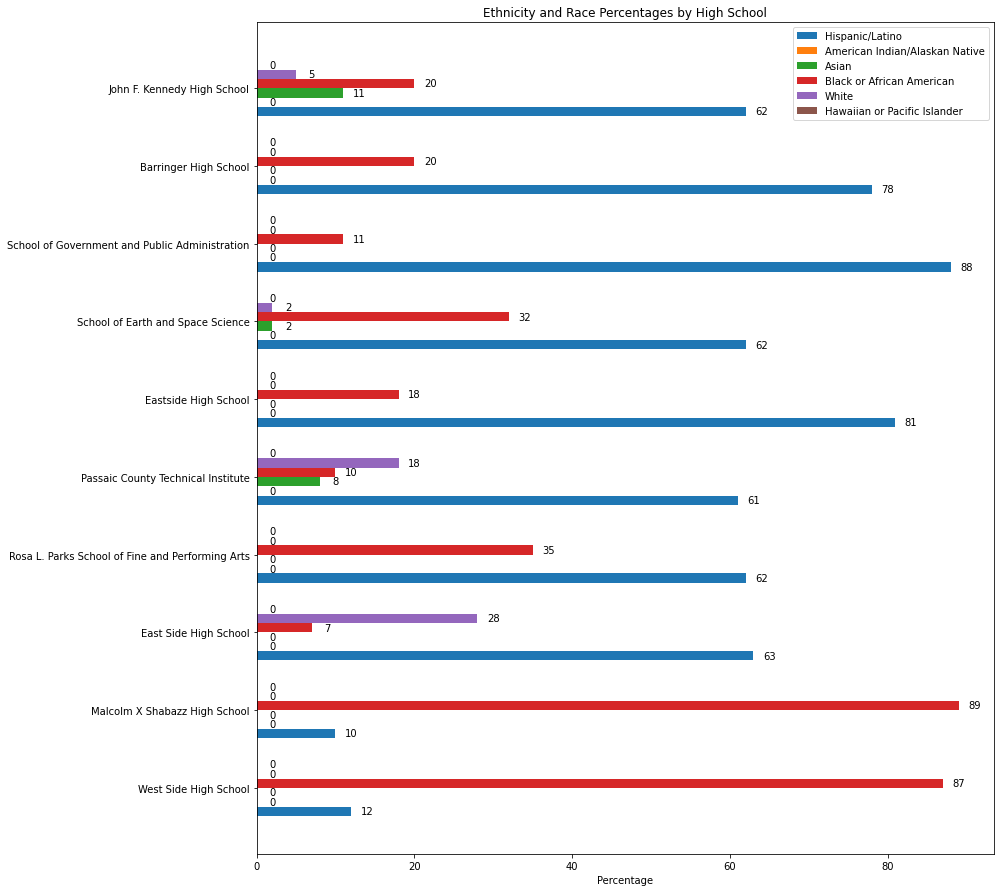

In [ ]:
# Ethnicity and Race Percentages
categories = HS_df["HS_SchoolName"].values

# Label Locations
x = np.arange(len(HS_df))

# Width of the Bars
width = 0.12

## Obtain the Data
### White
WhiteInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_White"]])
White_labels = WhiteInfo[1]
White_counts = WhiteInfo[0]

### Hispanic
HispanicInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_Hispanic"]])
Hispanic_labels = HispanicInfo[1]
Hispanic_counts = HispanicInfo[0]

### Black
BlackInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_Black"]])
Black_labels = BlackInfo[1]
Black_counts = BlackInfo[0]

### Asian
AsianInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_Asian"]])
Asian_labels = AsianInfo[1]
Asian_counts = AsianInfo[0]

### Hawaiian
HawaiianInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_Hawaiian"]])
Hawaiian_labels = HawaiianInfo[1]
Hawaiian_counts = HawaiianInfo[0]

### American Indian
AmerIndInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_AmericanIndian"]])
AmerInd_labels = AmerIndInfo[1]
AmerInd_counts = AmerIndInfo[0]


## Create the Chart
plt.barh(x - (5 * (width/2)), Hispanic_counts, width, label="Hispanic/Latino")
plt.barh(x - (3 * (width/2)), AmerInd_counts, width, label="American Indian/Alaskan Native")
plt.barh(x - width/2, Asian_counts, width, label="Asian")
plt.barh(x + width/2, Black_counts, width, label="Black or African American")
plt.barh(x + (3 * (width/2)), White_counts, width, label="White")
plt.barh(x + (5 * (width/2)), Hawaiian_counts, width, label="Hawaiian or Pacific Islander")
plt.title("Ethnicity and Race Percentages by High School")
plt.xlabel("Percentage")
plt.yticks(x, categories)
    
# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(Hispanic_counts[i] + 2, x[i] - (5 * (width/2)), Hispanic_counts[i], ha="center", va="center")
    plt.text(AmerInd_counts[i] + 2, x[i] - (3 * (width/2)), AmerInd_counts[i], ha="center", va="center")
    plt.text(Asian_counts[i] + 2, x[i] - width/2, Asian_counts[i], ha="center", va="center")
    plt.text(Black_counts[i] + 2, x[i] + width/2, Black_counts[i], ha="center", va="center")
    plt.text(White_counts[i] + 2, x[i] + (3 * (width/2)), White_counts[i], ha="center", va="center")
    plt.text(Hawaiian_counts[i] + 2, x[i] + (5 * (width/2)), Hawaiian_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

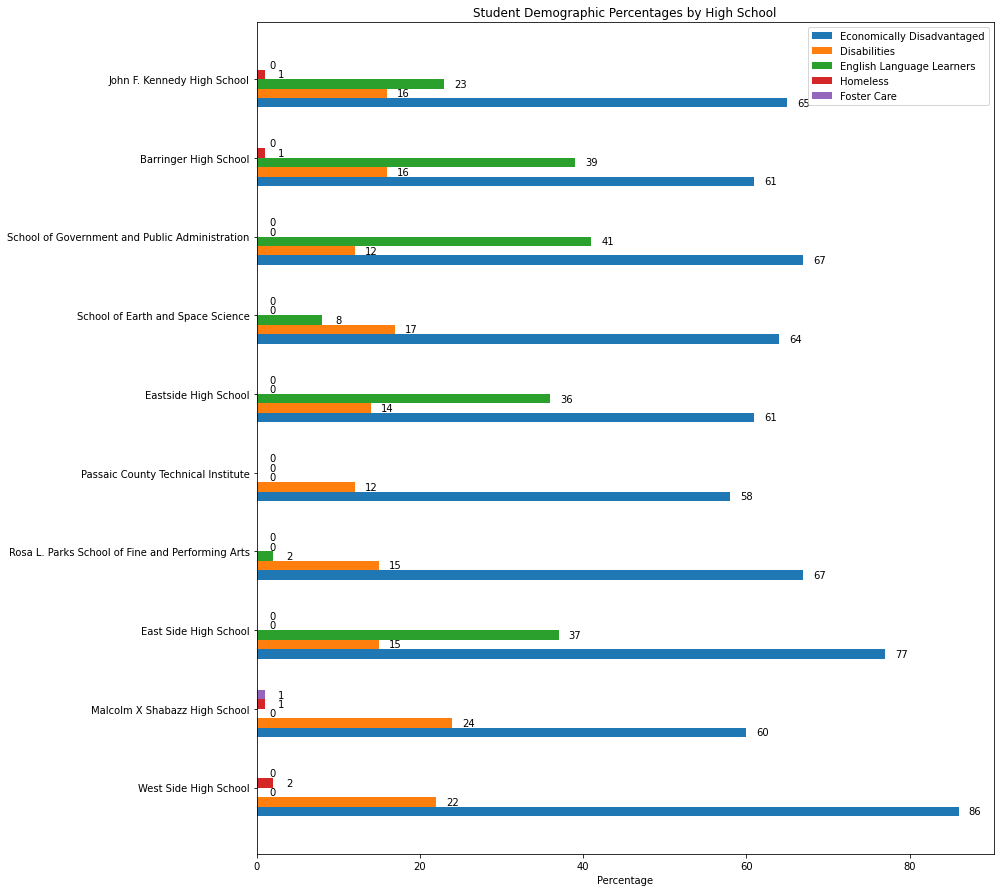

In [ ]:
# Student Demographics
categories = HS_df["HS_SchoolName"].values

# Label Locations
x = np.arange(len(HS_df))

# Width of the Bars
width = 0.12

## Obtain the Data
### Economically Disadvantaged
EconomDisInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_EconomDisadv"]])
EconomDis_labels = EconomDisInfo[1]
EconomDis_counts = EconomDisInfo[0]

### Disabilities
DisabilitiesInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_w/Disabilities"]])
Disabilities_labels = DisabilitiesInfo[1]
Disabilities_counts = DisabilitiesInfo[0]

### English Language Learners
ELLInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_ELL"]])
ELL_labels = ELLInfo[1]
ELL_counts = ELLInfo[0]

### Homeless
HomelessInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_Homeless"]])
Homeless_labels = HomelessInfo[1]
Homeless_counts = HomelessInfo[0]

### Foster Care
FosterCareInfo = HSContinuous(HS_df.loc[:, ["HS_SchoolName", "%_FosterCare"]])
FosterCare_labels = FosterCareInfo[1]
FosterCare_counts = FosterCareInfo[0]


## Create the Chart
plt.barh(x - (5 * (width/2)), EconomDis_counts, width, label="Economically Disadvantaged")
plt.barh(x - (3 * (width/2)), Disabilities_counts, width, label="Disabilities")
plt.barh(x - width/2, ELL_counts, width, label="English Language Learners")
plt.barh(x + width/2, Homeless_counts, width, label="Homeless")
plt.barh(x + (3 * (width/2)), FosterCare_counts, width, label="Foster Care")
plt.title("Student Demographic Percentages by High School")
plt.xlabel("Percentage")
plt.yticks(x, categories)
    
# Add Value Labels for the Bars
for i in range(len(categories)):
    plt.text(EconomDis_counts[i] + 2, x[i] - (5 * (width/2)), EconomDis_counts[i], ha="center", va="center")
    plt.text(Disabilities_counts[i] + 2, x[i] - (3 * (width/2)), Disabilities_counts[i], ha="center", va="center")
    plt.text(ELL_counts[i] + 2, x[i] - width/2, ELL_counts[i], ha="center", va="center")
    plt.text(Homeless_counts[i] + 2, x[i] + width/2, Homeless_counts[i], ha="center", va="center")
    plt.text(FosterCare_counts[i] + 2, x[i] + (3 * (width/2)), FosterCare_counts[i], ha="center", va="center")

plt.legend()
plt.tight_layout()
plt.show()

## <font color=royalblue>Look at the Summary of Each Numerical Attribute</font>

In [ ]:
eda_df.describe().loc[:,["GPA", "HSGrad_Age", "Absences", "SAT_Reading", "SAT_Math", "SAT_Writing", 
                         "NumStudents", "NumTeachers", "StudentTeacherRatio", "NumFreeLunch"]]

,GPA,HSGrad_Age,Absences,SAT_Reading,SAT_Math,SAT_Writing,NumStudents,NumTeachers,StudentTeacherRatio,NumFreeLunch
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,3.412085,6629.395161,9.338710,430.000000,480.129032,436.258065,864.381720,67.072581,12.209140,519.459677
std,0.639174,175.803559,7.746898,58.698624,56.454884,56.344450,728.900617,52.524489,1.977668,472.736539
min,1.300000,6161.000000,0.000000,270.000000,340.000000,200.000000,215.000000,18.000000,8.500000,111.000000
25%,2.998000,6498.500000,6.000000,420.000000,470.000000,427.500000,360.000000,36.000000,10.000000,221.000000
50%,3.430000,6608.000000,7.000000,420.000000,477.000000,434.000000,575.250000,42.875000,13.450000,310.750000
75%,3.875500,6722.000000,9.250000,420.000000,480.000000,442.500000,1706.000000,125.000000,13.600000,954.500000
max,4.550000,7217.000000,53.000000,660.000000,660.000000,610.000000,3429.000000,289.000000,14.500000,1663.000000


In [ ]:
eda_df.describe().loc[:,["NumReducedLunch", "%_Female", "%_Male", "%_EconomDisadv", "%_w/Disabilities",
                         "%_ELL", "%_Homeless", "%_FosterCare", "%_White", "%_Hispanic"]]

,NumReducedLunch,%_Female,%_Male,%_EconomDisadv,%_w/Disabilities,%_ELL,%_Homeless,%_FosterCare,%_White,%_Hispanic
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,61.142473,48.376344,51.623656,67.991129,17.462903,19.967204,0.878763,0.313441,9.622581,55.115323
std,95.484995,8.764287,8.764287,6.002953,2.989942,14.253807,0.522750,0.458394,11.223530,19.320725
min,0.000000,37.500000,31.000000,58.900000,12.200000,0.400000,0.100000,0.000000,0.100000,10.400000
25%,0.000000,44.625000,54.000000,65.400000,15.800000,2.600000,0.400000,0.125000,0.900000,62.100000
50%,14.000000,45.000000,55.000000,65.400000,16.900000,23.425000,1.000000,0.125000,5.650000,62.100000
75%,112.500000,46.000000,55.375000,69.975000,16.900000,37.900000,1.000000,0.200000,8.787500,63.400000
max,304.000000,69.000000,62.500000,86.000000,24.300000,41.300000,2.100000,1.400000,28.900000,88.100000


In [ ]:
eda_df.describe().loc[:,["%_Black", "%_Asian", "%_Hawaiian", "%_AmericanIndian", "HS_CrimesIndex_2020",
                         "HS_PersonalCrimesIndex_2020", "HS_MurdersIndex_2020"]]

,%_Black,%_Asian,%_Hawaiian,%_AmericanIndian,HS_CrimesIndex_2020,HS_PersonalCrimesIndex_2020,HS_MurdersIndex_2020
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,30.284946,4.956720,0.002419,0.000806,92.233871,151.895161,262.620968
std,26.761218,5.449618,0.020015,0.008980,31.613805,85.866489,265.460594
min,7.100000,0.000000,0.000000,0.000000,68.000000,17.000000,10.000000
25%,11.200000,0.500000,0.000000,0.000000,72.000000,101.000000,126.250000
50%,20.550000,0.900000,0.000000,0.000000,72.000000,110.000000,132.000000
75%,35.500000,11.700000,0.000000,0.000000,99.000000,183.000000,233.000000
max,89.300000,11.700000,0.200000,0.100000,181.000000,320.000000,873.000000


In [ ]:
eda_df.describe().loc[:,["HS_RapesIndex_2020", "HS_RobberiesIndex_2020", "HS_AssaultsIndex_2020", 
                         "HS_PropertyCrimesIndex_2020", "HS_BurglariesIndex_2020"]]

,HS_RapesIndex_2020,HS_RobberiesIndex_2020,HS_AssaultsIndex_2020,HS_PropertyCrimesIndex_2020,HS_BurglariesIndex_2020
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,76.080645,282.927419,110.306452,82.798387,106.104839
std,34.944229,157.550465,64.651433,24.642148,39.830090
min,9.000000,20.000000,17.000000,66.000000,35.000000
25%,57.000000,193.500000,70.750000,66.000000,75.750000
50%,63.000000,216.000000,76.000000,72.000000,112.000000
75%,82.000000,336.000000,138.000000,86.000000,135.000000
max,155.000000,602.000000,240.000000,170.000000,188.000000


In [ ]:
eda_df.describe().loc[:,["HS_LarceniesIndex_2020", "HS_VehicleTheftsIndex_2020", "HS_AreaPopulation_2020", 
                         "HS_Area", "Student_CrimesIndex_2020"]]

,HS_LarceniesIndex_2020,HS_VehicleTheftsIndex_2020,HS_AreaPopulation_2020,HS_Area,Student_CrimesIndex_2020
count,124.000000,124.000000,124.000000,1.240000e+02,124.000000
mean,61.137097,198.056452,25895.524194,9.493287e+06,112.209677
std,23.018669,86.171723,14828.023815,1.190136e+07,26.619961
min,44.000000,32.000000,1674.000000,8.768255e+05,72.000000
25%,44.000000,140.000000,15052.000000,4.034220e+06,87.000000
50%,61.000000,147.000000,18684.000000,4.334901e+06,115.000000
75%,65.000000,199.000000,48894.000000,1.472647e+07,140.000000
max,156.000000,386.000000,53411.000000,1.135720e+08,181.000000


In [ ]:
eda_df.describe().loc[:,["Student_PersonalCrimesIndex_2020", "Student_MurdersIndex_2020", "Student_RapesIndex_2020",
                         "Student_RobberiesIndex_2020", "Student_AssaultsIndex_2020"]]

,Student_PersonalCrimesIndex_2020,Student_MurdersIndex_2020,Student_RapesIndex_2020,Student_RobberiesIndex_2020,Student_AssaultsIndex_2020
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,205.822581,316.500000,80.782258,389.935484,151.250000
std,66.575106,219.115239,31.469836,115.193139,52.826088
min,54.000000,13.000000,34.000000,73.000000,46.000000
25%,145.000000,155.000000,57.000000,313.000000,97.000000
50%,224.000000,282.000000,87.000000,419.000000,164.000000
75%,257.000000,312.000000,93.750000,477.000000,196.000000
max,320.000000,873.000000,155.000000,602.000000,240.000000


In [ ]:
eda_df.describe().loc[:,["Student_PropertyCrimesIndex_2020", "Student_BurglariesIndex_2020", "Student_LarceniesIndex_2020",
                         "Student_VehicleTheftsIndex_2020"]]

,Student_PropertyCrimesIndex_2020,Student_BurglariesIndex_2020,Student_LarceniesIndex_2020,Student_VehicleTheftsIndex_2020
count,124.000000,124.000000,124.000000,124.000000
mean,96.943548,142.306452,72.209677,198.080645
std,21.163438,33.945000,19.797460,79.751810
min,66.000000,45.000000,44.000000,47.000000
25%,78.000000,112.000000,58.000000,140.000000
50%,95.000000,137.000000,65.000000,179.000000
75%,120.000000,177.000000,91.000000,201.250000
max,170.000000,188.000000,156.000000,403.000000


In [ ]:
eda_df.describe().loc[:,["Student_AreaPopulation_2020", "Student_Area", "Distance_to_HS", "Distance_to_PS"]]

,Student_AreaPopulation_2020,Student_Area,Distance_to_HS,Distance_to_PS
count,124.000000,1.240000e+02,124.000000,124.000000
mean,21750.282258,5.837553e+06,6.372629,138.529686
std,9220.163598,3.926902e+06,8.495294,457.654551
min,1674.000000,8.768255e+05,0.097676,0.856602
25%,15052.000000,3.816374e+06,0.956932,5.965637
50%,19067.000000,4.334901e+06,1.526972,18.378680
75%,25973.000000,7.265109e+06,4.458758,39.049746
max,51735.000000,3.834368e+07,23.205605,4101.085101


## <font color=royalblue>Look for Correlation Between Any of the Attributes</font>

#### <font color=darkviolet>With the Target Variable</font>

In [ ]:
# Comprehensive List of All 52 Categorical Variables
categoricals = ["Gender", "Hispanic", "AmerInd", "Asian", "Black", "White", "Hawaiian", "Multinational", "LimitedEnglish", 
                "Eligibility", "AcademNeed", "Grade_EnteredUB", "Participation", "AcademAch_ELA", "AcademAch_Math", 
                "Employed", "CulturalAct", "CommServ", "LEPServs", "AP", "Honors", "Cert_or_Diploma", "AssocDeg", "BachDeg", 
                "PS_Graduated", "STEMDeg", "HS_SchoolName", "Charter", "Magnet", "Title1_School", "Title1_SchoolWide", 
                "PS_SchoolName", "HS_TotalCrimesCateg", "HS_PersonalCrimesCateg", "HS_MurdersCateg", "HS_RapesCateg", 
                "HS_RobberiesCateg", "HS_AssaultsCateg", "HS_PropertyCrimesCateg", "HS_BurglariesCateg", "HS_LarceniesCateg", 
                "HS_VehicleTheftsCateg", "Student_TotalCrimesCateg", "Student_PersonalCrimesCateg", "Student_MurdersCateg", 
                "Student_RapesCateg", "Student_RobberiesCateg", "Student_AssaultsCateg", "Student_PropertyCrimesCateg", 
                "Student_BurglariesCateg", "Student_LarceniesCateg", "Student_VehicleTheftsCateg"]

# Comprehensive List of All 50 Continuous Variables
continuous = ["GPA", "HSGrad_Age", "Absences", "SAT_Reading", "SAT_Math", "SAT_Writing", "NumStudents", "NumTeachers", 
              "StudentTeacherRatio", "NumFreeLunch", "NumReducedLunch", "%_Female", "%_Male", "%_EconomDisadv", 
              "%_w/Disabilities", "%_ELL", "%_Homeless", "%_FosterCare", "%_White", "%_Hispanic", "%_Black", "%_Asian", 
              "%_Hawaiian", "%_AmericanIndian", "HS_CrimesIndex_2020", "HS_PersonalCrimesIndex_2020", "HS_MurdersIndex_2020",
              "HS_RapesIndex_2020", "HS_RobberiesIndex_2020", "HS_AssaultsIndex_2020", "HS_PropertyCrimesIndex_2020",
              "HS_BurglariesIndex_2020", "HS_LarceniesIndex_2020", "HS_VehicleTheftsIndex_2020", "HS_AreaPopulation_2020", 
              "HS_Area", "Student_CrimesIndex_2020", "Student_PersonalCrimesIndex_2020", "Student_MurdersIndex_2020", 
              "Student_RapesIndex_2020", "Student_RobberiesIndex_2020", "Student_AssaultsIndex_2020", 
              "Student_PropertyCrimesIndex_2020", "Student_BurglariesIndex_2020", "Student_LarceniesIndex_2020", 
              "Student_VehicleTheftsIndex_2020", "Student_AreaPopulation_2020", "Student_Area", "Distance_to_HS", 
              "Distance_to_PS"]

##### <font color=mediumorchid>With Categorical Predictors</font>

In [ ]:
categoricalPredictors = categoricals.copy()
categoricalPredictors.remove("PS_Graduated")
print(len(categoricalPredictors))

51


In [ ]:
# Create a List for All Predictors Associated with the Target Variable (PS_Graduated)
associatedPredictors = []

# Perform the Chi-Square Test of Independence
for predictor in categoricalPredictors:
    # Create a Crosstabulation Table with the Target Variable and the Predictor
    crosstab = pd.crosstab(eda_df["PS_Graduated"], eda_df[predictor])
    
    # Perform the Test and Extract the p-value
    ## Output is:
    #      (Chi-Square Test Statistic,
    #       p-value,
    #       Degrees of Freedom,
    #       Expected Cell Counts)
    pValue = stats.chi2_contingency(crosstab)[1]
    
    # Check If p-value Is Small
    if pValue < 0.05:
        # Add to the List of Associated Predictors
        associatedPredictors.append(predictor)

In [ ]:
print("Number of Associated Predictors: ", len(associatedPredictors))

Number of Associated Predictors:  8


In [ ]:
print(associatedPredictors)

['Asian', 'Black', 'Honors', 'Cert_or_Diploma', 'AssocDeg', 'BachDeg', 'STEMDeg', 'Title1_SchoolWide']


##### <font color=mediumorchid>With Continuous Predictors</font>

In [ ]:
continuousPredictors = continuous.copy()
print(len(continuousPredictors))

50


In [ ]:
# Perform the Two-Sample T-Test
for predictor in continuousPredictors:
    # Convert the Target Variable's String Values to Numerical Ones
    target = eda_df["PS_Graduated"].transform(lambda x: 1 if x == "Yes" else 0)
    
    # Perform the Test and Extract the p-value
    ## Output is:
    #      (t-statistic,
    #       p-value)
    pValue = stats.ttest_ind(a=target, b=eda_df[predictor], equal_var=True)[1]
    
    # Check If p-value Is Small
    if pValue < 0.05:
        # Add to the List of Associated Predictors
        associatedPredictors.append(predictor)

In [ ]:
print("Number of Associated Predictors: ", len(associatedPredictors))

Number of Associated Predictors:  58


In [ ]:
print(associatedPredictors)

['Asian', 'Black', 'Honors', 'Cert_or_Diploma', 'AssocDeg', 'BachDeg', 'STEMDeg', 'Title1_SchoolWide', 'GPA', 'HSGrad_Age', 'Absences', 'SAT_Reading', 'SAT_Math', 'SAT_Writing', 'NumStudents', 'NumTeachers', 'StudentTeacherRatio', 'NumFreeLunch', 'NumReducedLunch', '%_Female', '%_Male', '%_EconomDisadv', '%_w/Disabilities', '%_ELL', '%_Homeless', '%_FosterCare', '%_White', '%_Hispanic', '%_Black', '%_Asian', '%_Hawaiian', '%_AmericanIndian', 'HS_CrimesIndex_2020', 'HS_PersonalCrimesIndex_2020', 'HS_MurdersIndex_2020', 'HS_RapesIndex_2020', 'HS_RobberiesIndex_2020', 'HS_AssaultsIndex_2020', 'HS_PropertyCrimesIndex_2020', 'HS_BurglariesIndex_2020', 'HS_LarceniesIndex_2020', 'HS_VehicleTheftsIndex_2020', 'HS_AreaPopulation_2020', 'HS_Area', 'Student_CrimesIndex_2020', 'Student_PersonalCrimesIndex_2020', 'Student_MurdersIndex_2020', 'Student_RapesIndex_2020', 'Student_RobberiesIndex_2020', 'Student_AssaultsIndex_2020', 'Student_PropertyCrimesIndex_2020', 'Student_BurglariesIndex_2020', 'St

In [ ]:
# Output List to .csv File to Use in Code #6
with open("/content/drive/MyDrive/Thesis/Codes/Final Datasets/associated_predictors.txt", "w") as output:
    row_counter = 1
    
    for predictor in associatedPredictors:
        # Add a New Line Character to Every Row Except the Final Row
        if row_counter == len(associatedPredictors):
            output.write(predictor)
        else:
            output.write(predictor + "\n")
        
        # Increase the Row Counter
        row_counter += 1

#### <font color=darkviolet>Among the Predictors</font>

In [ ]:
corr_matrix = eda_df.corr()

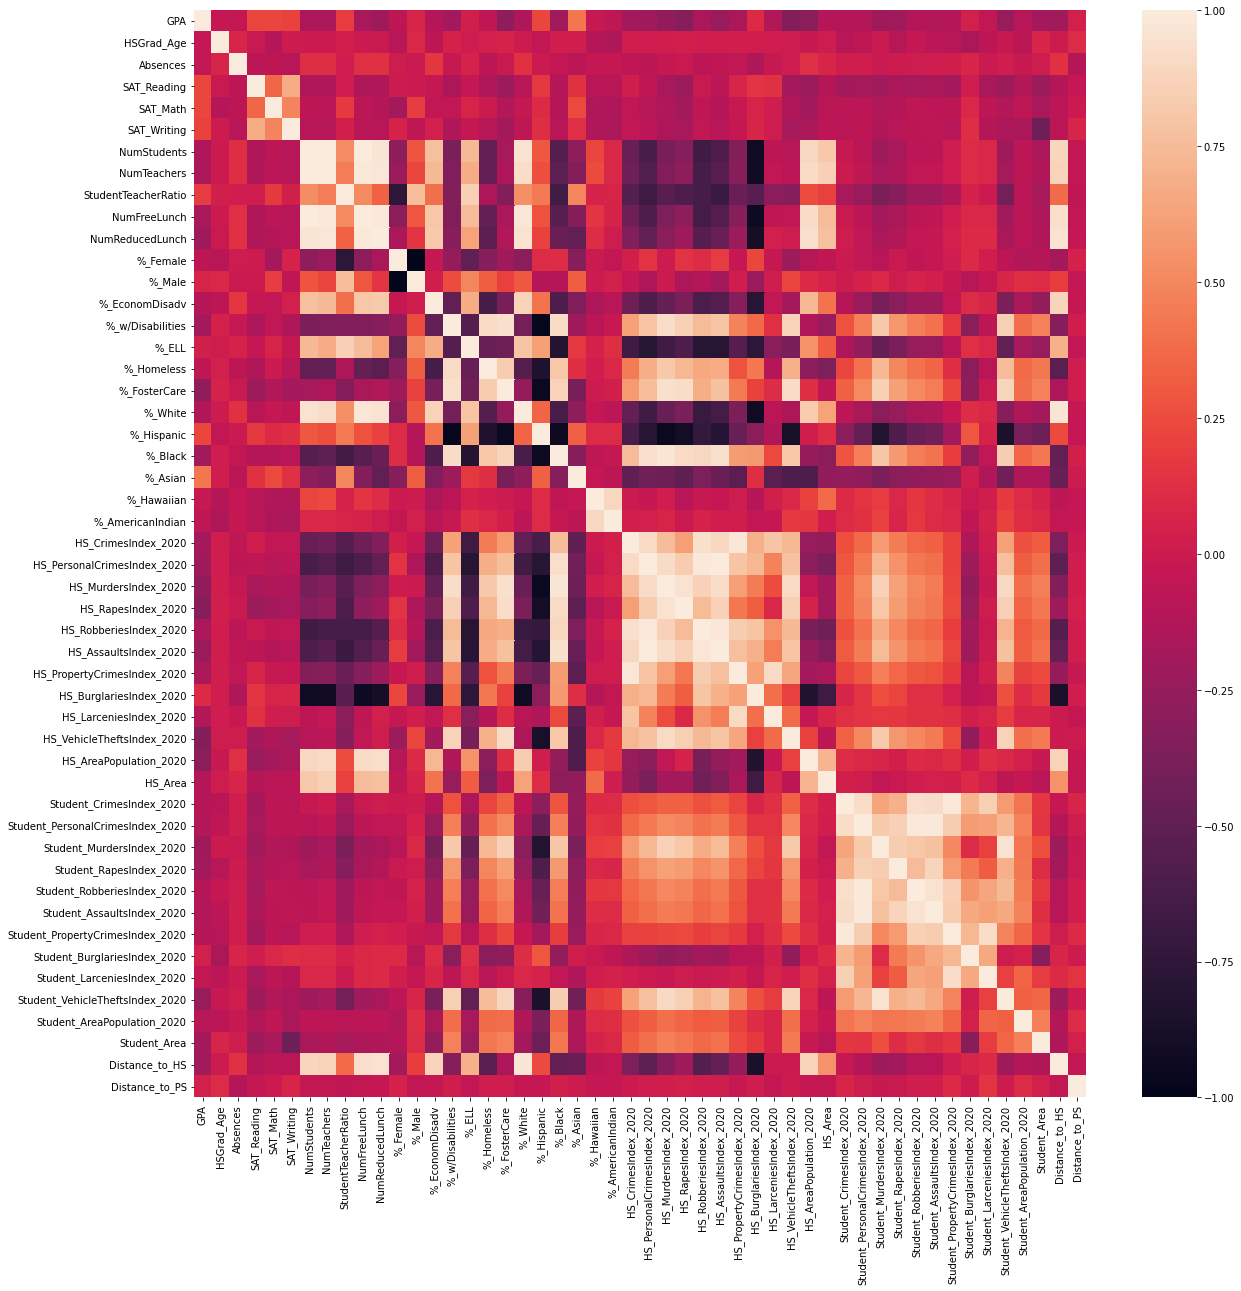

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix)

In [ ]:
corr_matrix[corr_matrix > 0.75]

,GPA,HSGrad_Age,Absences,SAT_Reading,SAT_Math,SAT_Writing,NumStudents,NumTeachers,StudentTeacherRatio,NumFreeLunch,...,Student_RobberiesIndex_2020,Student_AssaultsIndex_2020,Student_PropertyCrimesIndex_2020,Student_BurglariesIndex_2020,Student_LarceniesIndex_2020,Student_VehicleTheftsIndex_2020,Student_AreaPopulation_2020,Student_Area,Distance_to_HS,Distance_to_PS
GPA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSGrad_Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Absences,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAT_Reading,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAT_Math,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAT_Writing,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumStudents,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.995150,NaN,0.993210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.889605,NaN
NumTeachers,NaN,NaN,NaN,NaN,NaN,NaN,0.995150,1.000000,NaN,0.983962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873030,NaN
StudentTeacherRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFreeLunch,NaN,NaN,NaN,NaN,NaN,NaN,0.993210,0.983962,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.932230,NaN


In [ ]:
corr_matrix[corr_matrix < -0.75]

,GPA,HSGrad_Age,Absences,SAT_Reading,SAT_Math,SAT_Writing,NumStudents,NumTeachers,StudentTeacherRatio,NumFreeLunch,...,Student_RobberiesIndex_2020,Student_AssaultsIndex_2020,Student_PropertyCrimesIndex_2020,Student_BurglariesIndex_2020,Student_LarceniesIndex_2020,Student_VehicleTheftsIndex_2020,Student_AreaPopulation_2020,Student_Area,Distance_to_HS,Distance_to_PS
GPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSGrad_Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Absences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAT_Reading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAT_Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAT_Writing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumStudents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTeachers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StudentTeacherRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFreeLunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <font color=darkviolet>Findings</font>

The following are strongly <font color=limegreen>**positively**</font> correlated:
 - `NumStudents` **and**
     - NumTeachers
     - NumFreeLunch
     - NumReducedLunch
     - %_EconomDisadv
     - %_White
     - HS_AreaPopulation_2020
     - HS_Area
     - Distance_to_HS
     
     
 - `NumTeachers` **and**
     - NumFreeLunch
     - NumReducedLunch
     - %_White
     - HS_AreaPopulation_2020
     - HS_Area
     - Distance_to_HS
     
     
 - `StudentTeacherRatio` **and** 
     - %_Male
     - %_ELL
     
     
 - `NumFreeLunch` **and** 
     - %_EconomDisadv
     - %_ELL
     - %_White
     - HS_AreaPopulation_2020
     - HS_Area
     - Distance_to_HS
     
     
 - `NumReducedLunch` **and**
     - %_EconomDisadv
     - %_White
     - HS_AreaPopulation_2020
     - HS_Area
     - Distance_to_HS
     
     
 - `%_EconomDisadv` **and**
     - %_White
     - Distance_to_HS
     
     
 - `%_w/Disabilities` **and**
     - %_Homeless
     - %_FosterCare
     - %_Black
     - HS_PersonalCrimesIndex_2020
     - HS_MurdersIndex_2020
     - HS_RapesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_MurdersIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
 - `%_ELL` **and**
     - %_White
     
     
 - `%_Homeless` **and**
     - %_FosterCare
     - %_Black
     - HS_MurdersIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
 - `%_FosterCare` **and**
     - %_Black
     - HS_PersonalCrimesIndex_2020
     - HS_MurdersIndex_2020
     - HS_RapesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_MurdersIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
 - `%_White` **and**
     - HS_AreaPopulation_2020
     - Distance_to_HS
     
     
- `%_Black` **and**
     - HS_CrimesIndex_2020
     - HS_PersonalCrimesIndex_2020
     - HS_MurdersIndex_2020
     - HS_RapesIndex_2020
     - HS_RobberiesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_MurdersIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
 - `%_Hawaiian` **and**
     - %_AmericanIndian
     
     
 - `HS_CrimesIndex_2020` **and**
     - HS_PersonalCrimesIndex_2020
     - HS_MurdersIndex_2020
     - HS_RobberiesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_PropertyCrimesIndex_2020
     - HS_LarceniesIndex_2020
     
     
 - `HS_PersonalCrimesIndex_2020` **and**
     - HS_MurdersIndex_2020
     - HS_RapesIndex_2020
     - HS_RobberiesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_PropertyCrimesIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
 - `HS_MurdersIndex_2020` **and**
     - HS_RapesIndex_2020
     - HS_RobberiesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_MurdersIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
 - `HS_RapesIndex_2020` **and**
     - HS_AssaultsIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_MurdersIndex_2020
     - Student_VehicleTheftsIndex_2020
     
 - `HS_RobberiesIndex_2020` **and**
     - HS_AssaultsIndex_2020
     - HS_PropertyCrimesIndex_2020
     - HS_BurglariesIndex_2020
     
     
 - `HS_AssaultsIndex_2020` **and**
     - HS_PropertyCrimesIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
  - `HS_PropertyCrimesIndex_2020` **and**
      - HS_LarceniesIndex_2020
      
      
  - `HS_VehicleTheftsIndex_2020` **and**
      - Student_MurdersIndex_2020
      - Student_VehicleTheftsIndex_2020
      
      
  - `HS_AreaPopulation_2020` **and**
      - Distance_to_HS
      
      
  - `Student_CrimesIndex_2020` **and**
      - Student_PersonalCrimesIndex_2020
      - Student_RobberiesIndex_2020
      - Student_AssaultsIndex_2020
      - Student_PropertyCrimesIndex_2020
      - Student_LarceniesIndex_2020
      
      
  - `Student_PersonalCrimesIndex_2020` **and**
      - Student_MurdersIndex_2020
      - Student_RapesIndex_2020
      - Student_RobberiesIndex_2020
      - Student_AssaultsIndex_2020
      - Student_PropertyCrimesIndex_2020
      
      
  - `Student_MurdersIndex_2020` **and**
      - Student_RapesIndex_2020
      - Student_RobberiesIndex_2020
      - Student_AssaultsIndex_2020
      - Student_VehicleTheftsIndex_2020
      
      
  - `Student_RapesIndex_2020` **and**
      - Student_RobberiesIndex_2020
      - Student_AssaultsIndex_2020
      
      
  - `Student_RobberiesIndex_2020` **and**
     - Student_AssaultsIndex_2020
     - Student_PropertyCrimesIndex_2020
     
     
  - `Student_AssaultsIndex_2020` **and**
      - Student_PropertyCrimesIndex_2020
      
      
  - `Student_PropertyCrimesIndex_2020` **and**
      - Student_LarceniesIndex_2020

---

The following are strongly <font color=red>**negatively**</font> correlated:
 - `StudentTeacherRatio` **and**
     - %_Female
     
     
 - `NumStudents` **and**
     - HS_BurglariesIndex_2020
     
     
 - `NumTeachers` **and**
     - HS_BurglariesIndex_2020
     
     
 - `NumFreeLunch` **and**
     - HS_BurglariesIndex_2020

     
 - `NumReducedLunch` **and**
     - HS_BurglariesIndex_2020
     
     
 - `%_Female` **and**
     - %_Male
     
     
 - `%_EconomDisadv` **and**
     - HS_BurglariesIndex_2020
     
     
 - `%_ELL` **and**
     - %_Black
     - HS_PersonalCrimesIndex_2020
     - HS_RobberiesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_BurglariesIndex_2020
     
     
 - `%_w/Disabilities` **and**
     - %_Hispanic
     
     
 - `%_Homeless` **and**
     - %_Hispanic
     
     
 - `%_FosterCare` **and**
     - %_Hispanic
     
     
 - `%_White` **and**
     - HS_BurglariesIndex_2020
     
 
 - `%_Hispanic` **and**
     - %_Black
     - HS_PersonalCrimesIndex_2020
     - HS_MurdersIndex_2020
     - HS_RapesIndex_2020
     - HS_AssaultsIndex_2020
     - HS_VehicleTheftsIndex_2020
     - Student_MurdersIndex_2020
     - Student_VehicleTheftsIndex_2020
     
     
  - `HS_BurglariesIndex_2020	` **and**
     - HS_AreaPopulation_2020
     - Distance_to_HS